## 1. 라이브러리 불러오기 및 기본 정보 확인

In [2]:
# ====================================
# 1점 리뷰 심층 분석
# ====================================

# 기본 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (matplotlib)
plt.rcParams['font.family'] = 'NanumGothic'  # 또는 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# NLP 라이브러리
from collections import Counter
import re
from wordcloud import WordCloud

# 시각화 스타일
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ 라이브러리 로딩 완료!")
print(f"📊 pandas 버전: {pd.__version__}")
print(f"📊 numpy 버전: {np.__version__}")

✅ 라이브러리 로딩 완료!
📊 pandas 버전: 2.3.3
📊 numpy 버전: 2.4.1


In [5]:
# ====================================
# 데이터 로드
# ====================================

# 1점 리뷰 데이터 로드
file_path = r'C:\Users\82103\Downloads\ICB\project2\data\review_ko\one_star_reviews_translated.csv'
df = pd.read_csv(file_path)

print("\n" + "="*60)
print("📂 데이터 로드 완료!")
print("="*60)
print(f"📊 총 리뷰 수: {len(df):,}건")
print(f"📊 컬럼: {list(df.columns)}")



📂 데이터 로드 완료!
📊 총 리뷰 수: 7,169건
📊 컬럼: ['order_id', 'review_comment_title', 'review_comment_message', 'message_ko', 'title_ko']


In [6]:
print(f"\n📋 데이터 정보:")
print(df.info())


📋 데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7169 entries, 0 to 7168
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   order_id                7169 non-null   object
 1   review_comment_title    1483 non-null   object
 2   review_comment_message  7169 non-null   object
 3   message_ko              7164 non-null   object
 4   title_ko                1477 non-null   object
dtypes: object(5)
memory usage: 280.2+ KB
None


In [7]:
print(f"\n📋 첫 5개 샘플:")
print(df.head())


📋 첫 5개 샘플:
                           order_id review_comment_title  \
0  e6ce16cb79ec1d90b1da9085a6118aeb                  NaN   
1  acce194856392f074dbf9dada14d8d82   NÃO RECOMENDO!!!!    
2  1790eea0b567cf50911c057cf20f90f9          Enganadores   
3  6ea2f835b4556291ffdc53fa0b3b95e8                  NaN   
4  6ebaec694d7025e2ad4a05dba887c032                  NaN   

                              review_comment_message  \
0                         Aguardando retorno da loja   
1  Até o momento não recebi o produto Protetor De...   
2  Foi entregue um produto divergente do que eu h...   
3  Inicialmente, na data da compra o produto era ...   
4         A cuba veio quebrada. Como efetuo barroca?   

                                          message_ko         title_ko  
0                                    매장에서 반품을 기다리는 중              NaN  
1  지금까지 유아용 침대용 매트리스 보호대 - 방수 면 제품을 받지 못했습니다. 이미 ...  나는 추천하지 않는다!!!!  
2  광고 설명에 나열된 모든 액세서리가 함께 제공되지 않을 뿐만 아니라 내가 구매한 제...              사기꾼  
3 

In [8]:
# 결측치 확인
print(f"\n🔍 결측치 현황:")
print(df.isnull().sum())


🔍 결측치 현황:
order_id                     0
review_comment_title      5686
review_comment_message       0
message_ko                   5
title_ko                  5692
dtype: int64


In [9]:
# 번역 완료율
print(f"\n📊 번역 완료율:")
print(f"  - 본문 번역: {df['message_ko'].notna().sum():,}건 ({df['message_ko'].notna().sum()/len(df)*100:.1f}%)")
if 'title_ko' in df.columns:
    print(f"  - 제목 번역: {df['title_ko'].notna().sum():,}건 ({df['title_ko'].notna().sum()/len(df)*100:.1f}%)")


📊 번역 완료율:
  - 본문 번역: 7,164건 (99.9%)
  - 제목 번역: 1,477건 (20.6%)


In [10]:
# 원본 데이터에서 제목 유무 확인
print("📊 원본 데이터 제목 현황:")
print(f"  - 원본 제목 있음: {df['review_comment_title'].notna().sum():,}건")
print(f"  - 원본 제목 없음: {df['review_comment_title'].isna().sum():,}건")

# 번역 성공률 (원본이 있는 것 중)
has_original_title = df['review_comment_title'].notna()
if has_original_title.sum() > 0:
    translation_success = df[has_original_title]['title_ko'].notna().sum()
    print(f"\n✅ 제목 번역 성공률: {translation_success}/{has_original_title.sum()}건 ({translation_success/has_original_title.sum()*100:.1f}%)")

📊 원본 데이터 제목 현황:
  - 원본 제목 있음: 1,483건
  - 원본 제목 없음: 5,686건

✅ 제목 번역 성공률: 1477/1483건 (99.6%)


In [11]:
# 텍스트 길이 계산
df['message_length'] = df['message_ko'].str.len()
df['word_count'] = df['message_ko'].str.split().str.len()

# 기본 통계
print("📊 리뷰 본문 길이 통계 (문자 수):")
print(df['message_length'].describe())

print("\n📊 단어 수 통계:")
print(df['word_count'].describe())

# 길이별 분포
total = len(df)
short = (df['message_length'] < 50).sum()
medium = ((df['message_length'] >= 50) & (df['message_length'] < 200)).sum()
long = (df['message_length'] >= 200).sum()

print("\n📊 리뷰 길이 분포:")
print(f"  짧은 리뷰 (<50자):     {short:,}건 ({short/total*100:.1f}%)")
print(f"  중간 리뷰 (50-200자):  {medium:,}건 ({medium/total*100:.1f}%)")
print(f"  긴 리뷰 (200자+):      {long:,}건 ({long/total*100:.1f}%)")

# 가장 짧은 리뷰와 가장 긴 리뷰
print("\n📝 가장 짧은 리뷰 3개:")
shortest = df.nsmallest(3, 'message_length')[['message_ko', 'message_length']]
for idx, row in shortest.iterrows():
    print(f"  - ({row['message_length']}자) {row['message_ko']}")

print("\n📝 가장 긴 리뷰 TOP 3:")
longest = df.nlargest(3, 'message_length')[['message_ko', 'message_length']]
for idx, row in longest.iterrows():
    print(f"  - ({row['message_length']}자) {row['message_ko'][:100]}...")

📊 리뷰 본문 길이 통계 (문자 수):
count    7164.000000
mean       52.985343
std        32.422408
min         1.000000
25%        26.000000
50%        47.000000
75%        79.000000
max       213.000000
Name: message_length, dtype: float64

📊 단어 수 통계:
count    7164.000000
mean       11.953797
std         7.159515
min         1.000000
25%         6.000000
50%        11.000000
75%        18.000000
max        35.000000
Name: word_count, dtype: float64

📊 리뷰 길이 분포:
  짧은 리뷰 (<50자):     3,791건 (52.9%)
  중간 리뷰 (50-200자):  3,372건 (47.0%)
  긴 리뷰 (200자+):      1건 (0.0%)

📝 가장 짧은 리뷰 3개:
  - (1.0자) 비
  - (1.0자) 똥
  - (1.0자) 영

📝 가장 긴 리뷰 TOP 3:
  - (213.0자) 상품을 받지도 못한 경우 매장을 어떻게 평가하나요? ???????????????????????????????????????????????????????????????????????...
  - (156.0자) 크리스마스가 왔습니다. 손자가 선물을 기다리고 있습니다. 11월 25일에 구입했는데 지금까지 아무것도 없습니다.
무엇을 해야 할까요? 당신은 대답조차 할 수 없습니다. 호세 도스...
  - (154.0자) 저는 Lannister 웹사이트에서 933XL Cian 및 932XL Black 카트리지를 구입했습니다. 설명에는 둘 다 정품 HP, 각 색상별로 03개 단위가 있습니다.저는 2개...


## 2. 키워드 빈도 분석

In [12]:
from collections import Counter
import re

# 텍스트 전처리 함수
def preprocess_text(text):
    """특수문자 제거, 정리"""
    if pd.isna(text):
        return ""
    # 한글, 영문, 숫자, 공백만 남기기
    text = re.sub(r'[^가-힣a-zA-Z0-9\s]', ' ', str(text))
    # 여러 공백을 하나로
    text = re.sub(r'\s+', ' ', text)
    return text.strip().lower()

# 전처리 적용
df['message_clean'] = df['message_ko'].apply(preprocess_text)

# 불용어 정의
stopwords = {
    '것', '수', '및', '등', '안', '더', '때', '또', '그', '저', '이', '가', '을', '를',
    '나', '너', '저희', '우리', '그것', '이것', '저것', '에', '의', '이', '는',
    '있습니다', '합니다', '입니다', '했습니다', '있어', '없어', '있는', '없는',
    '매우', '정말', '너무', '아주', '완전', '좀', '잘', '못', '안'
}

# 모든 리뷰에서 단어 추출
all_words = []
for text in df['message_clean']:
    if text:
        words = text.split()
        # 2글자 이상, 불용어 제외
        words = [w for w in words if len(w) >= 2 and w not in stopwords]
        all_words.extend(words)

# 단어 빈도 계산
word_freq = Counter(all_words)
top_30 = word_freq.most_common(30)

print("📊 TOP 30 키워드 (빈도순):")
print("="*60)
for i, (word, count) in enumerate(top_30, 1):
    percentage = (count / len(df)) * 100
    print(f"{i:2d}. {word:15s} : {count:5,}회 ({percentage:4.1f}%)")

print("\n💡 총 고유 단어 수:", len(word_freq))

📊 TOP 30 키워드 (빈도순):
 1. 받지              : 1,336회 (18.6%)
 2. 제품을             : 1,289회 (18.0%)
 3. 제품이             :   985회 (13.7%)
 4. 않았습니다           :   939회 (13.1%)
 5. 아직              :   878회 (12.2%)
 6. 못했습니다           :   859회 (12.0%)
 7. 나는              :   756회 (10.5%)
 8. 않습니다            :   712회 ( 9.9%)
 9. 상품을             :   625회 ( 8.7%)
10. 다른              :   600회 ( 8.4%)
11. 구매했는데           :   585회 ( 8.2%)
12. 없습니다            :   584회 ( 8.1%)
13. 상품이             :   532회 ( 7.4%)
14. 기다리고            :   511회 ( 7.1%)
15. 도착하지            :   480회 ( 6.7%)
16. 제품              :   478회 ( 6.7%)
17. 받았습니다           :   471회 ( 6.6%)
18. 1개만             :   402회 ( 5.6%)
19. 이미              :   401회 ( 5.6%)
20. 구매한             :   376회 ( 5.2%)
21. 배송되지            :   375회 ( 5.2%)
22. 배송              :   328회 ( 4.6%)
23. 지금까지            :   315회 ( 4.4%)
24. 대한              :   299회 ( 4.2%)
25. 배송이             :   294회 ( 4.1%)
26. 도착했습니다          :   280회 ( 3.9%)
27. 제품은           

In [13]:
# 단어 빈도를 DataFrame으로 변환
word_df = pd.DataFrame(word_freq.most_common(), columns=['단어', '빈도'])
word_df['비율(%)'] = (word_df['빈도'] / len(df) * 100).round(2)

# CSV로 저장
word_df.to_csv('../data/one_star_review_result/one_star_word_frequency.csv', index=False, encoding='utf-8-sig')
print(f"✅ {len(word_df):,}개 단어를 'one_star_word_frequency.csv'에 저장했습니다.")

# 상위 100개만 미리보기
print("\n📊 TOP 100 단어:")
print(word_df.head(100).to_string())

✅ 15,388개 단어를 'one_star_word_frequency.csv'에 저장했습니다.

📊 TOP 100 단어:
           단어    빈도  비율(%)
0          받지  1336  18.64
1         제품을  1289  17.98
2         제품이   985  13.74
3       않았습니다   939  13.10
4          아직   878  12.25
5       못했습니다   859  11.98
6          나는   756  10.55
7        않습니다   712   9.93
8         상품을   625   8.72
9          다른   600   8.37
10      구매했는데   585   8.16
11       없습니다   584   8.15
12        상품이   532   7.42
13       기다리고   511   7.13
14       도착하지   480   6.70
15         제품   478   6.67
16      받았습니다   471   6.57
17        1개만   402   5.61
18         이미   401   5.59
19        구매한   376   5.24
20       배송되지   375   5.23
21         배송   328   4.58
22       지금까지   315   4.39
23         대한   299   4.17
24        배송이   294   4.10
25     도착했습니다   280   3.91
26        제품은   275   3.84
27       싶습니다   269   3.75
28        때문에   265   3.70
29        품질이   264   3.68
30         2개   260   3.63
31      구입했는데   242   3.38
32        2개를   225   3.14
33       못했어요 

### claude 에게 전체 고유 단어 던지고, 얻은 키워드 빈도 분석 결과

In [15]:
import pandas as pd
from collections import Counter

# ========================================
# Step 3: 키워드 분석 결과 종합
# ========================================

# 1. 단어 빈도 데이터 로드
word_freq_df = pd.read_csv('../data/one_star_review_result/one_star_word_frequency.csv')

print("="*70)
print("Step 3: 키워드 분석 결과")
print("="*70)

# 2. TOP 50 키워드 출력
print("\n📊 TOP 50 주요 키워드:")
print("-"*70)
for i, row in word_freq_df.head(50).iterrows():
    print(f"{i+1:2d}. {row['단어']:20s} : {row['빈도']:5,}회 ({row['비율(%)']:5.1f}%)")

# 3. 카테고리별 키워드 그룹핑
keyword_categories = {
    '배송 문제': ['받지', '못했습니다', '않았습니다', '아직', '도착하지', 
                 '배송되지', '배송', '지금까지', '기다리고', '현재까지'],
    
    '수량 문제': ['1개만', '2개', '2개를', '하나만', '누락되었습니다', 
                 '3개', '2개만', '함께', '없이'],
    
    '제품 불일치': ['다른', '잘못된', '일치하지', '맞지', '다릅니다',
                  '것과', '이상', '틀린'],
    
    '품질 문제': ['품질이', '결함이', '작동하지', '문제가', '끔찍한',
                '좋지', '나쁜', '불량', '파손'],
    
    '고객 응대': ['답변을', '응답을', '응답이', '연락을', '아무도',
                '아무런', '전혀', '이메일을', '무시']
}

# 4. 카테고리별 총 언급 횟수 계산
print("\n\n📊 카테고리별 키워드 언급 통계:")
print("="*70)

category_stats = {}
for category, keywords in keyword_categories.items():
    total_count = 0
    for keyword in keywords:
        match = word_freq_df[word_freq_df['단어'] == keyword]
        if not match.empty:
            total_count += match.iloc[0]['빈도']
    
    category_stats[category] = total_count
    percentage = (total_count / 7169) * 100  # 전체 리뷰 수
    print(f"{category:15s} : {total_count:6,}회 언급 (리뷰의 {percentage:5.1f}%)")

# 5. 특정 패턴 검색
print("\n\n📊 주요 불만 패턴:")
print("-"*70)
patterns = {
    '"받지 못했다" 패턴': ['받지', '못했습니다', '못했어요', '못받'],
    '"아직 안왔다" 패턴': ['아직', '아직도', '아직까지', '지금까지', '현재까지'],
    '"수량 문제" 패턴': ['1개만', '2개만', '하나만', '누락'],
    '"다른 제품" 패턴': ['다른', '잘못된', '일치하지', '맞지'],
    '"응답 없음" 패턴': ['답변', '응답', '연락', '아무도', '전혀']
}

for pattern_name, keywords in patterns.items():
    total = 0
    for keyword in keywords:
        match = word_freq_df[word_freq_df['단어'] == keyword]
        if not match.empty:
            total += match.iloc[0]['빈도']
    percentage = (total / 7169) * 100
    print(f"{pattern_name:25s} : {total:5,}회 ({percentage:5.1f}%)")

# 6. 결과 저장 (수정된 버전)
analysis_summary = {
    'top_50_keywords': word_freq_df.head(50).to_dict('records'),
    'category_stats': {k: int(v) for k, v in category_stats.items()},  # int64 → int 변환
    'total_reviews': 7169,
    'analysis_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')
}

import json
with open('../data/one_star_review_result/step3_keyword_analysis.json', 'w', encoding='utf-8') as f:
    json.dump(analysis_summary, f, ensure_ascii=False, indent=2, default=int)  # default=int 추가

print("\n\n✅ 분석 결과 저장 완료:")
print("   - one_star_word_frequency.csv (전체 단어 빈도)")
print("   - step3_keyword_analysis.json (통계 요약)")
print("="*70)

Step 3: 키워드 분석 결과

📊 TOP 50 주요 키워드:
----------------------------------------------------------------------
 1. 받지                   : 1,336회 ( 18.6%)
 2. 제품을                  : 1,289회 ( 18.0%)
 3. 제품이                  :   985회 ( 13.7%)
 4. 않았습니다                :   939회 ( 13.1%)
 5. 아직                   :   878회 ( 12.2%)
 6. 못했습니다                :   859회 ( 12.0%)
 7. 나는                   :   756회 ( 10.6%)
 8. 않습니다                 :   712회 (  9.9%)
 9. 상품을                  :   625회 (  8.7%)
10. 다른                   :   600회 (  8.4%)
11. 구매했는데                :   585회 (  8.2%)
12. 없습니다                 :   584회 (  8.2%)
13. 상품이                  :   532회 (  7.4%)
14. 기다리고                 :   511회 (  7.1%)
15. 도착하지                 :   480회 (  6.7%)
16. 제품                   :   478회 (  6.7%)
17. 받았습니다                :   471회 (  6.6%)
18. 1개만                  :   402회 (  5.6%)
19. 이미                   :   401회 (  5.6%)
20. 구매한                  :   376회 (  5.2%)
21. 배송되지                 :   375회

In [16]:
import pandas as pd
from collections import Counter

# ========================================
# Step 4: 불만 유형 자동 분류
# ========================================

print("="*70)
print("Step 4: 불만 유형 자동 분류")
print("="*70)

# 데이터 로드
df = pd.read_csv('../data/review_ko/one_star_reviews_translated.csv')

# 불만 유형별 키워드 정의 (Step 3 분석 기반)
complaint_keywords = {
    '배송 미수령': [
        '받지', '못했습니다', '못했어요', '못받', '안왔', '오지',
        '도착하지', '배송되지', '배송되었습니다',
        '아직', '아직도', '아직까지', '지금까지', '현재까지',
        '기다리고', '기다리는'
    ],
    
    '수량 불일치': [
        '1개만', '2개만', '3개만', '하나만', '2개', '3개',
        '누락', '누락되었습니다', '빠진', '빠졌', '부족',
        '2개를', '함께', '없이', '빠져'
    ],
    
    '제품 불일치': [
        '다른', '다릅니다', '잘못된', '잘못', '틀린',
        '일치하지', '맞지', '설명과', '사진과',
        '광고와', '다르게', '이상한', '것과'
    ],
    
    '제품 품질': [
        '품질', '품질이', '결함', '결함이', '불량',
        '파손', '깨진', '망가진', '문제가', '문제를',
        '작동하지', '끔찍한', '나쁜', '좋지'
    ],
    
    '고객 응대': [
        '답변', '답변을', '응답', '응답을', '응답이',
        '연락', '연락을', '이메일', '이메일을',
        '아무도', '아무런', '전혀', '무시'
    ],
    
    '환불/반품': [
        '환불', '환불을', '반품', '반품을', '반품하고',
        '교환', '교환을', '취소', '돌려', '돌려받고',
        '반송'
    ],
    
    '배송 지연': [
        '늦게', '지연', '오래', '시간이', '시간에',
        '기한', '기한이', '지났는데', '마감'
    ]
}

# 분류 함수
def classify_complaint(text):
    """리뷰를 불만 유형으로 분류 (다중 라벨 가능)"""
    if pd.isna(text):
        return []
    
    text = str(text).lower()
    categories = []
    
    for category, keywords in complaint_keywords.items():
        if any(keyword in text for keyword in keywords):
            categories.append(category)
    
    return categories if categories else ['기타']

# 분류 적용
print("\n분류 중...")
df['complaint_types'] = df['message_ko'].apply(classify_complaint)

# 각 유형별 개수 계산
type_counts = {}
for types in df['complaint_types']:
    for t in types:
        type_counts[t] = type_counts.get(t, 0) + 1

# 결과 출력
print("\n📊 불만 유형 분포 (중복 가능):")
print("="*70)
total = len(df)
for category, count in sorted(type_counts.items(), key=lambda x: x[1], reverse=True):
    percentage = (count / total) * 100
    bar = '█' * int(percentage / 2)
    print(f"{category:15s} : {count:5,}건 ({percentage:5.1f}%) {bar}")

# 복합 불만 분석
multi = df[df['complaint_types'].str.len() > 1]
single = df[df['complaint_types'].str.len() == 1]
none = df[df['complaint_types'].str.len() == 0]

print(f"\n📊 불만 개수별 분포:")
print(f"  단일 불만:    {len(single):,}건 ({len(single)/total*100:.1f}%)")
print(f"  복합 불만:    {len(multi):,}건 ({len(multi)/total*100:.1f}%)")
if len(none) > 0:
    print(f"  분류 안됨:    {len(none):,}건 ({len(none)/total*100:.1f}%)")

# 가장 흔한 복합 패턴
print("\n📊 주요 복합 불만 패턴 TOP 10:")
multi_patterns = multi['complaint_types'].apply(lambda x: ' + '.join(sorted(x)))
pattern_counts = Counter(multi_patterns)
for i, (pattern, count) in enumerate(pattern_counts.most_common(10), 1):
    print(f"  {i:2d}. {pattern}: {count:,}건")

# 결과 저장
df['complaint_types_str'] = df['complaint_types'].apply(lambda x: ', '.join(x))
df.to_csv('../data/one_star_review_result/one_star_reviews_classified.csv', 
          index=False, encoding='utf-8-sig')

print("\n✅ 분류 결과 저장: one_star_reviews_classified.csv")
print("="*70)

Step 4: 불만 유형 자동 분류

분류 중...

📊 불만 유형 분포 (중복 가능):
배송 미수령          : 3,159건 ( 44.1%) ██████████████████████
수량 불일치          : 1,337건 ( 18.6%) █████████
기타              : 1,270건 ( 17.7%) ████████
제품 품질           : 1,114건 ( 15.5%) ███████
제품 불일치          : 1,087건 ( 15.2%) ███████
고객 응대           : 1,029건 ( 14.4%) ███████
환불/반품           : 1,003건 ( 14.0%) ██████
배송 지연           :   830건 ( 11.6%) █████

📊 불만 개수별 분포:
  단일 불만:    4,567건 (63.7%)
  복합 불만:    2,597건 (36.2%)
  분류 안됨:    5건 (0.1%)

📊 주요 복합 불만 패턴 TOP 10:
   1. 배송 미수령 + 배송 지연: 281건
   2. 고객 응대 + 배송 미수령: 233건
   3. 배송 미수령 + 수량 불일치: 218건
   4. 배송 미수령 + 환불/반품: 158건
   5. 고객 응대 + 배송 미수령 + 수량 불일치: 93건
   6. 제품 불일치 + 환불/반품: 90건
   7. 배송 미수령 + 제품 불일치: 87건
   8. 배송 미수령 + 제품 품질: 83건
   9. 제품 품질 + 환불/반품: 83건
  10. 수량 불일치 + 제품 불일치: 75건

✅ 분류 결과 저장: one_star_reviews_classified.csv


In [17]:
import pandas as pd
import random

# ========================================
# Step 5: 유형별 샘플 리뷰 확인
# ========================================

print("="*70)
print("Step 5: 유형별 샘플 리뷰 및 인사이트")
print("="*70)

# 분류된 데이터 로드
df = pd.read_csv('../data/one_star_review_result/one_star_reviews_classified.csv')

# complaint_types 컬럼을 리스트로 변환
df['complaint_types'] = df['complaint_types_str'].apply(
    lambda x: x.split(', ') if pd.notna(x) else []
)

# 주요 불만 유형별 샘플 추출
major_categories = ['배송 미수령', '수량 불일치', '제품 불일치', '제품 품질', '고객 응대']

for category in major_categories:
    # 해당 유형을 포함하는 리뷰 필터링
    category_df = df[df['complaint_types'].apply(lambda x: category in x)]
    
    print(f"\n{'='*70}")
    print(f"📝 [{category}] - 총 {len(category_df):,}건")
    print('='*70)
    
    # 랜덤 샘플 5개
    if len(category_df) >= 5:
        samples = category_df.sample(n=5, random_state=42)
    else:
        samples = category_df
    
    for idx, (_, row) in enumerate(samples.iterrows(), 1):
        title = row['title_ko'] if pd.notna(row['title_ko']) else "(제목 없음)"
        message = row['message_ko']
        types = row['complaint_types']
        
        # 리뷰 길이에 따라 표시
        if len(message) > 150:
            message_display = message[:150] + '...'
        else:
            message_display = message
        
        print(f"\n[샘플 {idx}]")
        if title != "(제목 없음)":
            print(f"제목: {title}")
        print(f"유형: {', '.join(types)}")
        print(f"내용: {message_display}")

# ========================================
# 비즈니스 인사이트 도출
# ========================================

print("\n" + "="*70)
print("🎯 비즈니스 인사이트 및 개선 제안")
print("="*70)

# 1. 배송 미수령 분석
delivery_issues = df[df['complaint_types'].apply(lambda x: '배송 미수령' in x)]
delivery_delayed = df[df['complaint_types'].apply(lambda x: '배송 지연' in x)]

print(f"\n【1. 물류/배송 시스템】")
print(f"  문제 규모: {len(delivery_issues):,}건 (전체의 {len(delivery_issues)/len(df)*100:.1f}%)")
print(f"  - 배송 미수령: {len(delivery_issues):,}건")
print(f"  - 배송 지연: {len(delivery_delayed):,}건")
print(f"  💡 제안: 배송 추적 시스템 개선, 물류 파트너 재평가")

# 2. 수량 불일치 분석
quantity_issues = df[df['complaint_types'].apply(lambda x: '수량 불일치' in x)]

print(f"\n【2. 주문/포장 프로세스】")
print(f"  문제 규모: {len(quantity_issues):,}건 (전체의 {len(quantity_issues)/len(df)*100:.1f}%)")
print(f"  💡 제안: 포장 전 수량 검증 단계 추가, QC 프로세스 강화")

# 3. 제품 불일치 분석
mismatch_issues = df[df['complaint_types'].apply(lambda x: '제품 불일치' in x)]

print(f"\n【3. 상품 정보 관리】")
print(f"  문제 규모: {len(mismatch_issues):,}건 (전체의 {len(mismatch_issues)/len(df)*100:.1f}%)")
print(f"  💡 제안: 상품 설명/이미지 정확성 검증, 재고 관리 시스템 개선")

# 4. 제품 품질 분석
quality_issues = df[df['complaint_types'].apply(lambda x: '제품 품질' in x)]

print(f"\n【4. 품질 관리】")
print(f"  문제 규모: {len(quality_issues):,}건 (전체의 {len(quality_issues)/len(df)*100:.1f}%)")
print(f"  💡 제안: 입고 시 품질 검사 강화, 공급업체 품질 기준 상향")

# 5. 고객 응대 분석
cs_issues = df[df['complaint_types'].apply(lambda x: '고객 응대' in x)]

print(f"\n【5. 고객 서비스】")
print(f"  문제 규모: {len(cs_issues):,}건 (전체의 {len(cs_issues)/len(df)*100:.1f}%)")
print(f"  💡 제안: 응답 시간 단축, 자동 응답 시스템 도입, CS 인력 확충")

# 6. 복합 문제 분석
multi_issues = df[df['complaint_types'].str.len() > 1]
worst_combo = df[df['complaint_types'].apply(
    lambda x: '배송 미수령' in x and '고객 응대' in x
)]

print(f"\n【6. 복합 문제 (최악의 케이스)】")
print(f"  복합 불만: {len(multi_issues):,}건 (전체의 {len(multi_issues)/len(df)*100:.1f}%)")
print(f"  배송 미수령 + 고객 응대 문제: {len(worst_combo):,}건")
print(f"  💡 제안: 문제 발생 시 즉각 고객 알림, 선제적 고객 소통")

# ========================================
# 우선순위 매트릭스
# ========================================

print("\n" + "="*70)
print("🎯 개선 우선순위 (영향도 기준)")
print("="*70)

priority_list = [
    ("배송 시스템 개선", len(delivery_issues), "긴급"),
    ("수량 검증 프로세스", len(quantity_issues), "높음"),
    ("상품 정보 정확성", len(mismatch_issues), "높음"),
    ("품질 관리 강화", len(quality_issues), "중간"),
    ("고객 응대 개선", len(cs_issues), "높음")
]

for i, (task, impact, urgency) in enumerate(sorted(priority_list, key=lambda x: x[1], reverse=True), 1):
    percentage = (impact / len(df)) * 100
    print(f"{i}. {task:25s} - 영향: {impact:,}건 ({percentage:4.1f}%) | 우선순위: {urgency}")

print("\n" + "="*70)
print("✅ Step 5 완료!")
print("="*70)

Step 5: 유형별 샘플 리뷰 및 인사이트

📝 [배송 미수령] - 총 3,159건

[샘플 1]
유형: 배송 미수령, 환불/반품
내용: 배송도 안됐고 주문을 취소하겠다고 했는데 지금까지 취소와 크레딧 환불을 기다리고 있어요

[샘플 2]
유형: 배송 미수령
내용: 배송비 냈는데 집에 안왔네요!!!!!!

[샘플 3]
제목: 나는받지 못했다
유형: 배송 미수령
내용: 해당 상품은 아직 배송되지 않았습니다.

[샘플 4]
유형: 배송 미수령, 환불/반품
내용: 집에서 제품을 받지 못했습니다.
배송비를 지불하고 우체국으로 반품해야 했습니다.
그래서 온라인 구매에는 별 메리트가 없다고 봅니다.

[샘플 5]
유형: 배송 미수령, 고객 응대
내용: 제품을 받지 못했습니다. 최대 배송 시간은 17년 3월 26일이었고, 3월 18일에 구매했는데 지금까지 회사로부터 아무런 응답도 받지 못했습니다. 완전히 무시하고 분개했습니다.

📝 [수량 불일치] - 총 1,337건

[샘플 1]
유형: 수량 불일치, 제품 불일치
내용: 2개 구매했는데 1개만 완성품으로 왔어요. 다른 키트에는 검정 잉크만 제공되었습니다.

[샘플 2]
유형: 수량 불일치
내용: 세 가지 제품을 주문하고 결제했는데 2개만 받았습니다. 세 번째 제품을 주문하고 결제하고 싶습니다.

[샘플 3]
유형: 수량 불일치
내용: 똑같은 상품 2개 구매했는데 1개만 도착했어요!

[샘플 4]
유형: 수량 불일치
내용: 1개만 받았고 2개에 대한 비용을 지불했습니다.

[샘플 5]
유형: 수량 불일치
내용: 사양에 따르면 제품은 Sony Z3 Plus E6533용이지만 함께 제공된 필름이 장치의 전체 화면을 덮지도 않습니다. 이 제품은 심각하고 오해의 소지가 있는 오류입니다.

📝 [제품 불일치] - 총 1,087건

[샘플 1]
제목: 다른 제품
유형: 제품 불일치, 고객 응대
내용: 광고모델과 전혀 다른 제품이 배송되었어요! 아무것도 해결되지 않았습니다.

[샘플 2]
유형: 제품 불일치
내용: 친애하는

시트 전

## 시각화(1점 리뷰)

로드된 폰트: Malgun Gothic


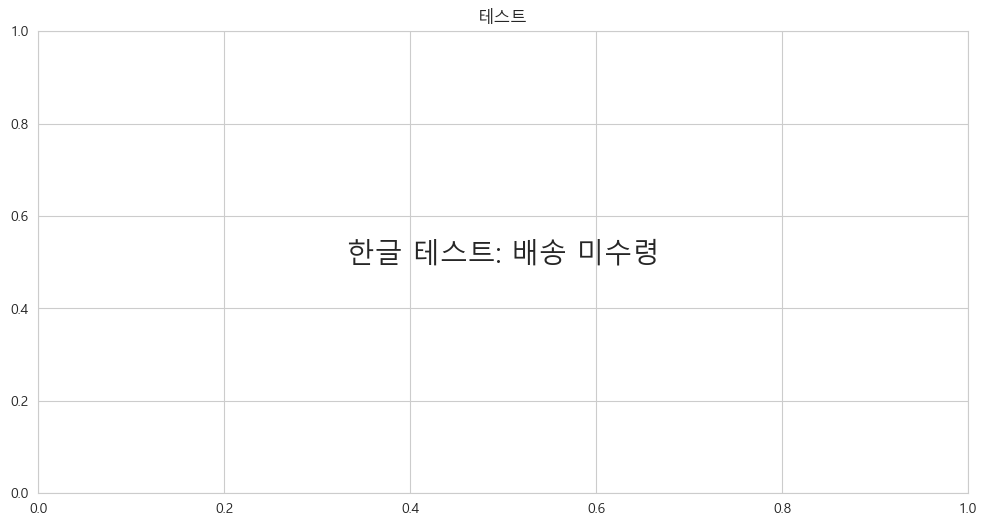

In [29]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 폰트 파일 직접 지정 (가장 확실한 방법)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 맑은 고딕 경로

# 폰트 로드
font_name = fm.FontProperties(fname=font_path).get_name()
print(f"로드된 폰트: {font_name}")

# 전역 설정
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False

# 테스트
fig, ax = plt.subplots()
ax.text(0.5, 0.5, '한글 테스트: 배송 미수령', fontsize=20, ha='center')
plt.title('테스트')
plt.show()

Step 6: 데이터 시각화

📊 1. 불만 유형 분포 차트 생성 중...


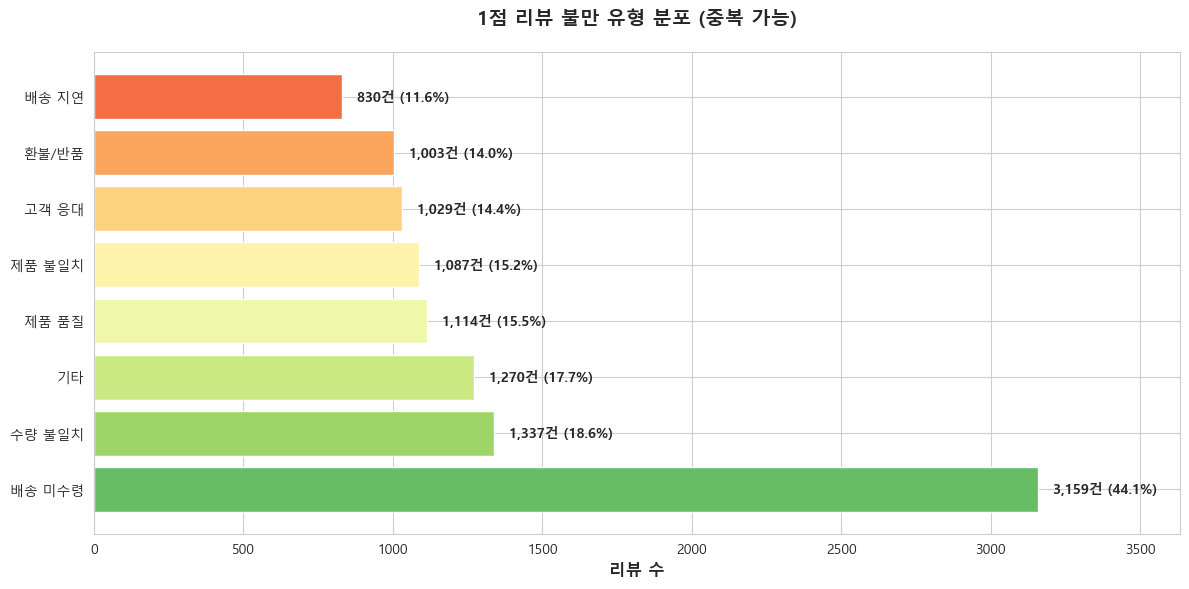

   ✅ 저장: fig1_complaint_distribution.png

📊 2. 단일/복합 불만 비율 차트 생성 중...


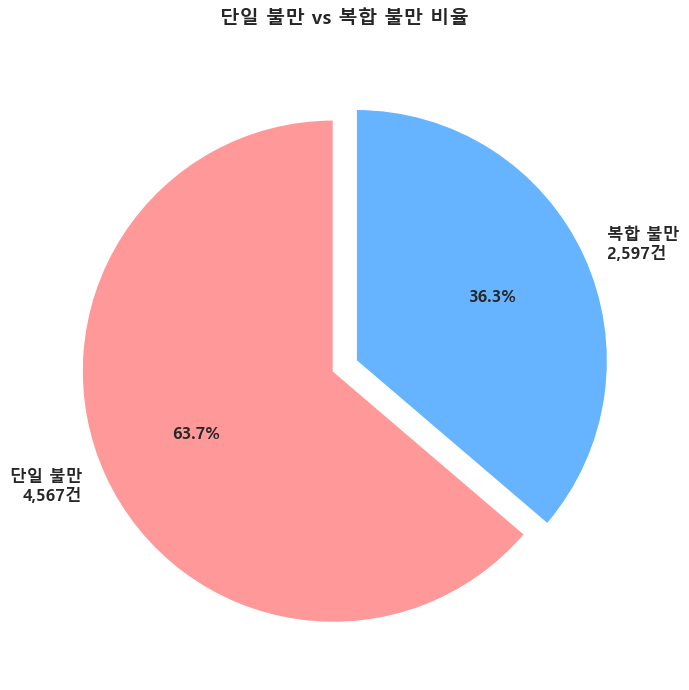

   ✅ 저장: fig2_single_vs_multi.png

📊 3. 복합 불만 패턴 TOP 10 차트 생성 중...


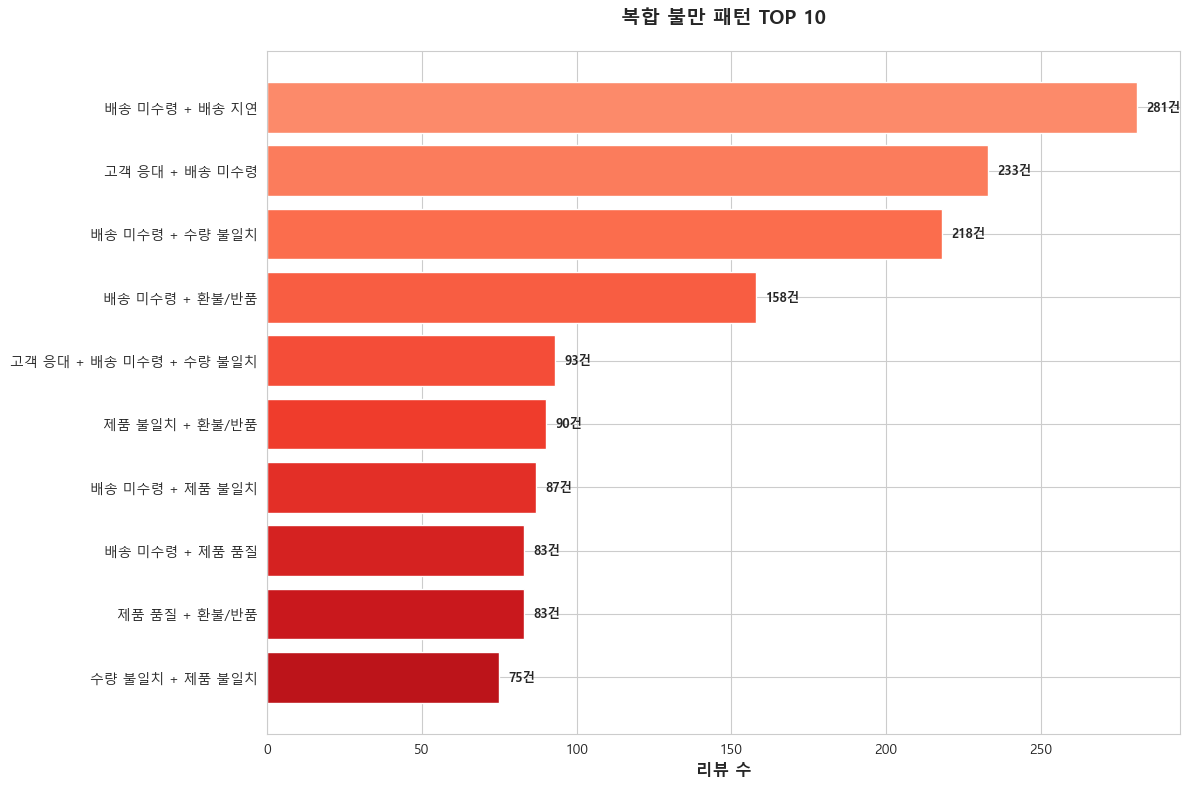

   ✅ 저장: fig3_top10_patterns.png

📊 4. 리뷰 길이 분포 차트 생성 중...


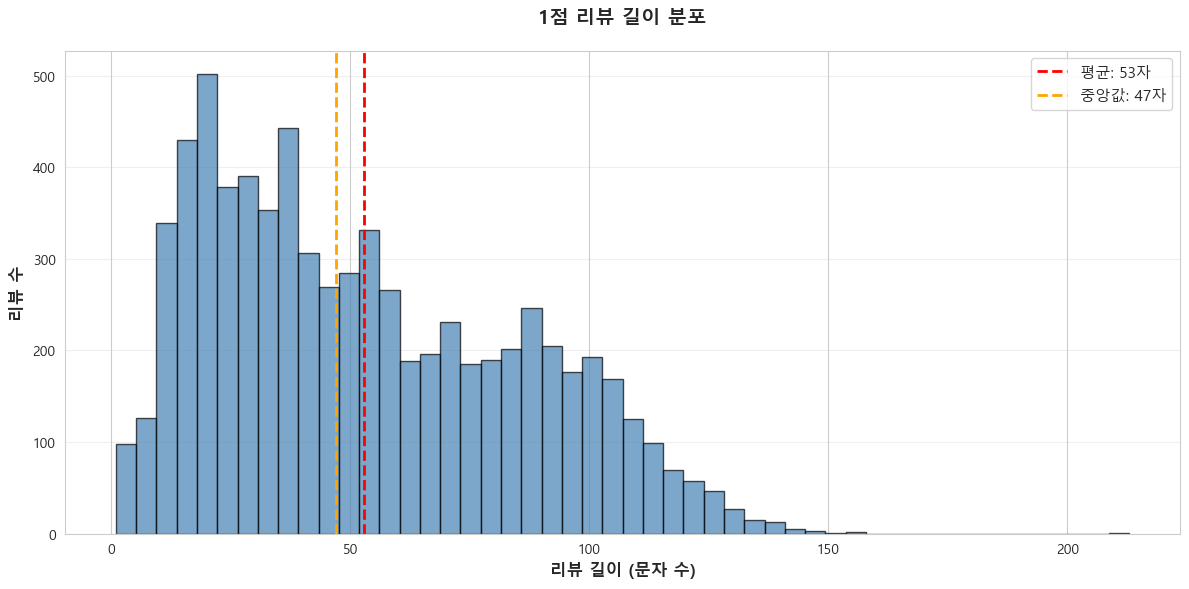

   ✅ 저장: fig4_length_distribution.png

📊 5. TOP 20 키워드 차트 생성 중...


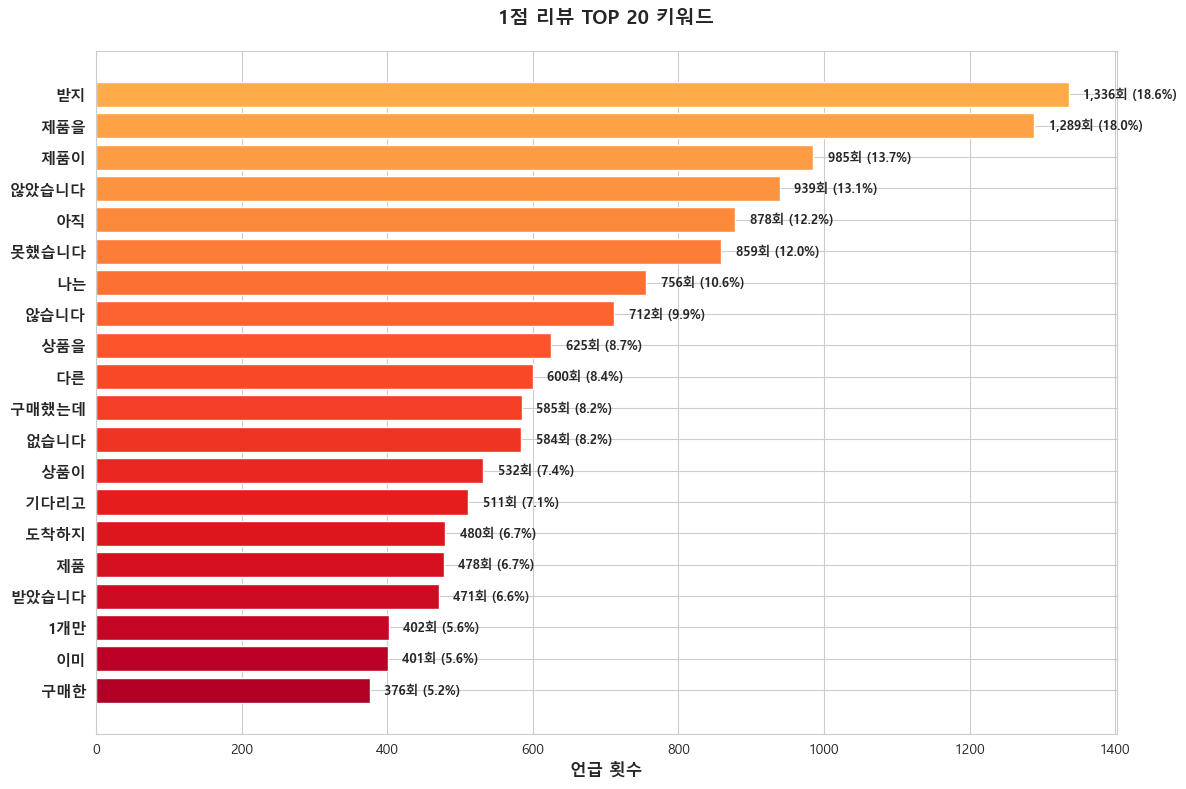

   ✅ 저장: fig5_top20_keywords.png

📊 6. 종합 대시보드 생성 중...


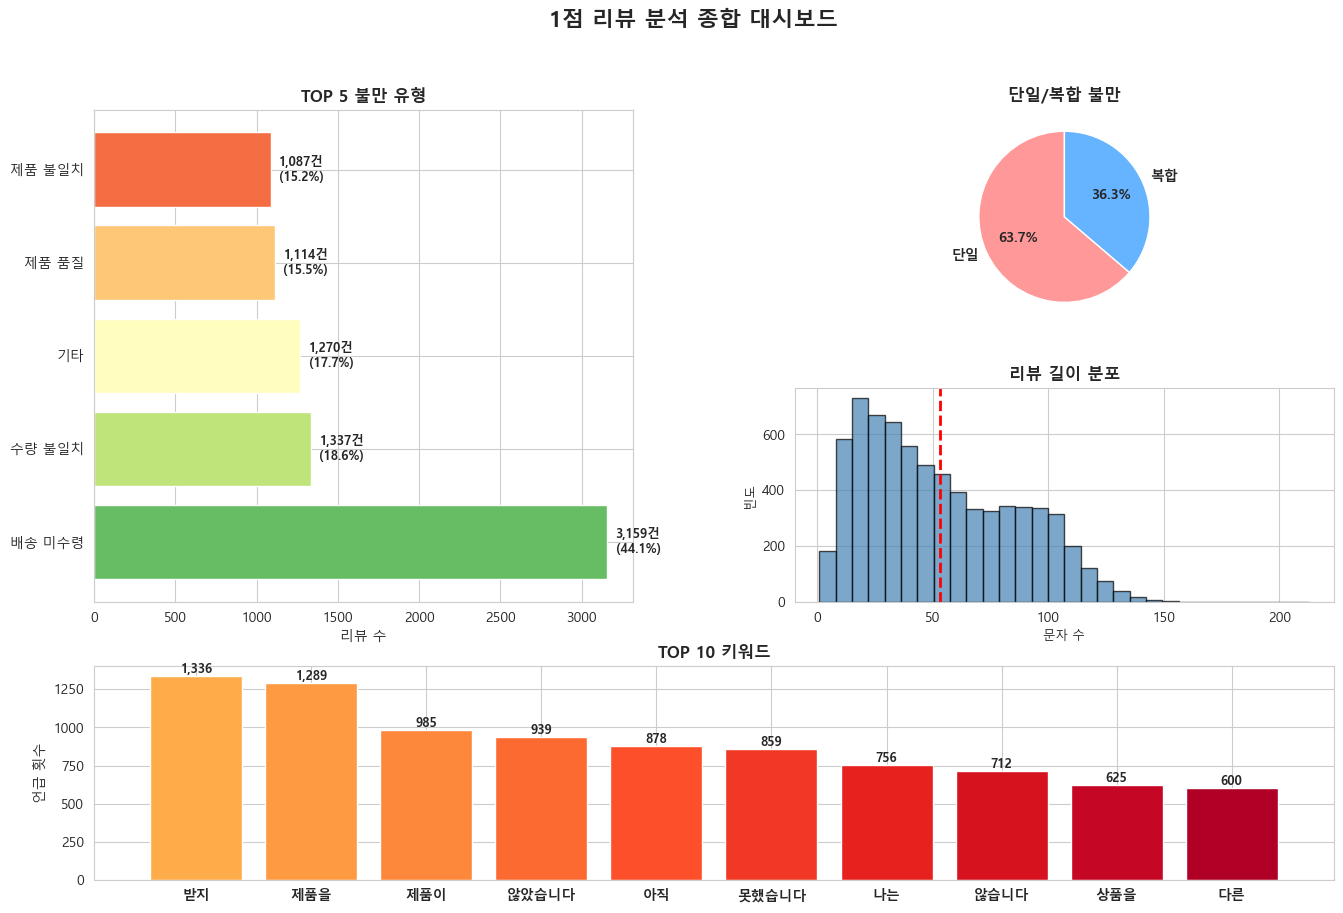

   ✅ 저장: fig6_dashboard.png

✅ Step 6 완료! 총 6개의 시각화 생성

생성된 파일:
  1. fig1_complaint_distribution.png - 불만 유형 분포
  2. fig2_single_vs_multi.png - 단일/복합 비율
  3. fig3_top10_patterns.png - 복합 불만 패턴 TOP 10
  4. fig4_length_distribution.png - 리뷰 길이 분포
  5. fig5_top20_keywords.png - TOP 20 키워드
  6. fig6_dashboard.png - 종합 대시보드


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

# ========================================
# Step 6: 데이터 시각화
# ========================================

print("="*70)
print("Step 6: 데이터 시각화")
print("="*70)

# 데이터 로드
df = pd.read_csv('../data/one_star_review_result/one_star_reviews_classified.csv')
df['complaint_types'] = df['complaint_types_str'].apply(
    lambda x: x.split(', ') if pd.notna(x) else []
)

# ========================================
# 1. 불만 유형 분포 - 가로 막대 차트
# ========================================

print("\n📊 1. 불만 유형 분포 차트 생성 중...")

# 유형별 카운트
type_counts = {}
for types in df['complaint_types']:
    for t in types:
        type_counts[t] = type_counts.get(t, 0) + 1

# 데이터 정렬
categories = list(type_counts.keys())
counts = list(type_counts.values())
sorted_data = sorted(zip(categories, counts), key=lambda x: x[1], reverse=True)
categories_sorted = [x[0] for x in sorted_data]
counts_sorted = [x[1] for x in sorted_data]
percentages = [(c / len(df)) * 100 for c in counts_sorted]

# 차트 생성
fig, ax = plt.subplots(figsize=(12, 6))
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(categories_sorted)))
bars = ax.barh(categories_sorted, counts_sorted, color=colors)

# 값 표시
for i, (bar, count, pct) in enumerate(zip(bars, counts_sorted, percentages)):
    ax.text(count + 50, i, f'{count:,}건 ({pct:.1f}%)', 
            va='center', fontsize=10, fontweight='bold')

ax.set_xlabel('리뷰 수', fontsize=12, fontweight='bold')
ax.set_title('1점 리뷰 불만 유형 분포 (중복 가능)', fontsize=14, fontweight='bold', pad=20)
ax.set_xlim(0, max(counts_sorted) * 1.15)
plt.tight_layout()
plt.savefig('../data/one_star_review_result/fig1_complaint_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("   ✅ 저장: fig1_complaint_distribution.png")

# ========================================
# 2. 단일 vs 복합 불만 - 파이 차트
# ========================================

print("\n📊 2. 단일/복합 불만 비율 차트 생성 중...")

single = df[df['complaint_types'].str.len() == 1]
multi = df[df['complaint_types'].str.len() > 1]

sizes = [len(single), len(multi)]
labels = [f'단일 불만\n{len(single):,}건', f'복합 불만\n{len(multi):,}건']
colors = ['#ff9999', '#66b3ff']
explode = (0.05, 0.05)

fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%',
                                    colors=colors, explode=explode,
                                    startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})

ax.set_title('단일 불만 vs 복합 불만 비율', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../data/one_star_review_result/fig2_single_vs_multi.png', dpi=300, bbox_inches='tight')
plt.show()
print("   ✅ 저장: fig2_single_vs_multi.png")

# ========================================
# 3. TOP 10 복합 불만 패턴 - 가로 막대
# ========================================

print("\n📊 3. 복합 불만 패턴 TOP 10 차트 생성 중...")

multi_patterns = multi['complaint_types'].apply(lambda x: ' + '.join(sorted(x)))
pattern_counts = Counter(multi_patterns)
top_10 = pattern_counts.most_common(10)

patterns = [x[0] for x in top_10]
pattern_values = [x[1] for x in top_10]

# 패턴명 줄바꿈 (너무 길면)
patterns_display = [p.replace(' + ', '\n+ ') if len(p) > 30 else p for p in patterns]

fig, ax = plt.subplots(figsize=(12, 8))
colors = plt.cm.Reds(np.linspace(0.4, 0.8, len(patterns)))
bars = ax.barh(range(len(patterns)), pattern_values, color=colors)

ax.set_yticks(range(len(patterns)))
ax.set_yticklabels(patterns_display, fontsize=10)
ax.set_xlabel('리뷰 수', fontsize=12, fontweight='bold')
ax.set_title('복합 불만 패턴 TOP 10', fontsize=14, fontweight='bold', pad=20)

# 값 표시
for i, (bar, val) in enumerate(zip(bars, pattern_values)):
    ax.text(val + 3, i, f'{val:,}건', va='center', fontsize=9, fontweight='bold')

ax.invert_yaxis()
plt.tight_layout()
plt.savefig('../data/one_star_review_result/fig3_top10_patterns.png', dpi=300, bbox_inches='tight')
plt.show()
print("   ✅ 저장: fig3_top10_patterns.png")

# ========================================
# 4. 리뷰 길이 분포 - 히스토그램
# ========================================

print("\n📊 4. 리뷰 길이 분포 차트 생성 중...")

df['message_length'] = df['message_ko'].str.len()

fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(df['message_length'].dropna(), bins=50, color='steelblue', edgecolor='black', alpha=0.7)
ax.axvline(df['message_length'].mean(), color='red', linestyle='--', 
           linewidth=2, label=f'평균: {df["message_length"].mean():.0f}자')
ax.axvline(df['message_length'].median(), color='orange', linestyle='--', 
           linewidth=2, label=f'중앙값: {df["message_length"].median():.0f}자')

ax.set_xlabel('리뷰 길이 (문자 수)', fontsize=12, fontweight='bold')
ax.set_ylabel('리뷰 수', fontsize=12, fontweight='bold')
ax.set_title('1점 리뷰 길이 분포', fontsize=14, fontweight='bold', pad=20)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../data/one_star_review_result/fig4_length_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("   ✅ 저장: fig4_length_distribution.png")

# ========================================
# 5. TOP 20 키워드 - 워드 클라우드 스타일 바 차트
# ========================================

print("\n📊 5. TOP 20 키워드 차트 생성 중...")

word_freq_df = pd.read_csv('../data/one_star_review_result/one_star_word_frequency.csv')
top_20 = word_freq_df.head(20)

fig, ax = plt.subplots(figsize=(12, 8))
colors = plt.cm.YlOrRd(np.linspace(0.4, 0.9, len(top_20)))
bars = ax.barh(range(len(top_20)), top_20['빈도'], color=colors)

ax.set_yticks(range(len(top_20)))
ax.set_yticklabels(top_20['단어'], fontsize=11, fontweight='bold')
ax.set_xlabel('언급 횟수', fontsize=12, fontweight='bold')
ax.set_title('1점 리뷰 TOP 20 키워드', fontsize=14, fontweight='bold', pad=20)

# 값과 비율 표시 (가장 안전)
for i in range(len(top_20)):
    count = top_20.iloc[i]['빈도']
    pct = top_20.iloc[i]['비율(%)']
    ax.text(count + 20, i, f'{count:,}회 ({pct:.1f}%)', 
            va='center', fontsize=9, fontweight='bold')

ax.invert_yaxis()
plt.tight_layout()
plt.savefig('../data/one_star_review_result/fig5_top20_keywords.png', dpi=300, bbox_inches='tight')
plt.show()
print("   ✅ 저장: fig5_top20_keywords.png")

# ========================================
# 6. 종합 대시보드
# ========================================

print("\n📊 6. 종합 대시보드 생성 중...")

fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# 6-1. 불만 유형 (왼쪽 상단)
ax1 = fig.add_subplot(gs[0:2, 0])
top_5_categories = categories_sorted[:5]
top_5_counts = counts_sorted[:5]
top_5_pct = percentages[:5]
colors1 = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, 5))
bars1 = ax1.barh(top_5_categories, top_5_counts, color=colors1)
for i, (bar, count, pct) in enumerate(zip(bars1, top_5_counts, top_5_pct)):
    ax1.text(count + 50, i, f'{count:,}건\n({pct:.1f}%)', va='center', fontsize=9, fontweight='bold')
ax1.set_title('TOP 5 불만 유형', fontsize=12, fontweight='bold')
ax1.set_xlabel('리뷰 수', fontsize=10)

# 6-2. 단일 vs 복합 (오른쪽 상단)
ax2 = fig.add_subplot(gs[0, 1])
ax2.pie(sizes, labels=['단일', '복합'], autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'],
        startangle=90, textprops={'fontsize': 10, 'fontweight': 'bold'})
ax2.set_title('단일/복합 불만', fontsize=12, fontweight='bold')

# 6-3. 리뷰 길이 (오른쪽 중간)
ax3 = fig.add_subplot(gs[1, 1])
ax3.hist(df['message_length'].dropna(), bins=30, color='steelblue', edgecolor='black', alpha=0.7)
ax3.axvline(df['message_length'].mean(), color='red', linestyle='--', linewidth=2)
ax3.set_title('리뷰 길이 분포', fontsize=12, fontweight='bold')
ax3.set_xlabel('문자 수', fontsize=9)
ax3.set_ylabel('빈도', fontsize=9)

# 6-4. TOP 10 키워드 (하단)
ax4 = fig.add_subplot(gs[2, :])
top_10_words = word_freq_df.head(10)
colors4 = plt.cm.YlOrRd(np.linspace(0.4, 0.9, 10))
bars4 = ax4.bar(range(len(top_10_words)), top_10_words['빈도'], color=colors4)
ax4.set_xticks(range(len(top_10_words)))
ax4.set_xticklabels(top_10_words['단어'], fontsize=10, fontweight='bold', rotation=0)
ax4.set_title('TOP 10 키워드', fontsize=12, fontweight='bold')
ax4.set_ylabel('언급 횟수', fontsize=10)
for i, (bar, row) in enumerate(zip(bars4, top_10_words.itertuples())):
    ax4.text(i, row.빈도 + 20, f'{row.빈도:,}', ha='center', fontsize=9, fontweight='bold')

fig.suptitle('1점 리뷰 분석 종합 대시보드', fontsize=16, fontweight='bold', y=0.98)
plt.savefig('../data/one_star_review_result/fig6_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()
print("   ✅ 저장: fig6_dashboard.png")

print("\n" + "="*70)
print("✅ Step 6 완료! 총 6개의 시각화 생성")
print("="*70)
print("\n생성된 파일:")
print("  1. fig1_complaint_distribution.png - 불만 유형 분포")
print("  2. fig2_single_vs_multi.png - 단일/복합 비율")
print("  3. fig3_top10_patterns.png - 복합 불만 패턴 TOP 10")
print("  4. fig4_length_distribution.png - 리뷰 길이 분포")
print("  5. fig5_top20_keywords.png - TOP 20 키워드")
print("  6. fig6_dashboard.png - 종합 대시보드")
print("="*70)

## 시간 분석 준비 (리뷰 작성일 - 주문일 - 배송일)

In [36]:
# 원본 order_reviews 테이블 확인
import pandas as pd

order_reviews = pd.read_csv('../data/processed_v2/olist_order_reviews_dataset.csv')
print(order_reviews.columns)
print(order_reviews.head())

# 날짜 컬럼이 있는지 확인
date_columns = [col for col in order_reviews.columns if 'date' in col.lower() or 'time' in col.lower()]
print(f"날짜 관련 컬럼: {date_columns}")

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')
                          review_id                          order_id  \
0  0574e3efaf2a10ee2d0c45b1ed544c84  bd2c2c3a4d59e68fb14a526745572883   
1  f542d0ff698f5272fbd13deca2349582  529a65336debb1c3e3327d7d67dc733d   
2  02d00568beb770ce3939f4fca60556a1  b0e9288a209f5ec50391c140dba4c91f   
3  c4836c2b7d45087213b6ad924f90f679  d02b32c3bcfb76481817b2222b990e84   
4  0a85120e444360801174a4a5f641bb3e  8506571faf231af2bd4e43d1ba47dce8   

   review_score review_comment_title review_comment_message  \
0             4                  NaN                    NaN   
1             5           Excelente                     NaN   
2             5                  NaN                    NaN   
3             5                  NaN                    NaN   
4             5                  NaN                    NaN 

In [ ]:
master_orders = pd.read_csv('../data/master_begin2017/master_orders_begin2017.csv')
print(master_orders.columns.tolist())
print(master_orders.head(3))

In [47]:
# reviews도 2017년 1월 1일부터 필터링
reviews = pd.read_csv('../data/raw/olist_order_reviews_dataset.csv')

# 날짜 변환
reviews['review_creation_date'] = pd.to_datetime(reviews['review_creation_date'])

# 2017-01-01 이후만
reviews_2017 = reviews[reviews['review_creation_date'] >= '2017-01-01']

print(f"원본 리뷰: {len(reviews):,}건")
print(f"2017년 이후: {len(reviews_2017):,}건")
print(f"제외됨: {len(reviews) - len(reviews_2017):,}건")

# 이제 1점 리뷰 필터링
one_star = reviews_2017[reviews_2017['review_score'] == 1.0]

원본 리뷰: 99,224건
2017년 이후: 98,899건
제외됨: 325건


In [49]:
import pandas as pd

# ========================================
# Step 7 (진짜 최종): 번역된 리뷰 기준
# ========================================

print("="*70)
print("Step 7: 번역된 1점 리뷰 시간 분석")
print("="*70)

# 1. 번역된 1점 리뷰 (우리가 분석할 대상)
df_translated = pd.read_csv('../data/review_ko/one_star_reviews_translated.csv')
print(f"\n번역된 1점 리뷰: {len(df_translated):,}건")

# 2. master_orders
master_orders = pd.read_csv('../data/master_begin2017/master_orders_begin2017.csv')

# 3. 원본 reviews (날짜 정보 가져오기 위해)
reviews = pd.read_csv('../data/raw/olist_order_reviews_dataset.csv')

# 4. 조인 (번역된 리뷰 기준 inner join)
df = df_translated.merge(
    reviews[['order_id', 'review_creation_date', 'review_answer_timestamp']],
    on='order_id',
    how='inner'  # 번역된 것만
).merge(
    master_orders[['order_id', 'order_purchase_timestamp', 
                   'order_delivered_customer_date', 'order_estimated_delivery_date',
                   'is_delayed', 'total_delivery_time']],
    on='order_id',
    how='inner'  # master_orders에 있는 것만
)

print(f"매칭 완료: {len(df):,}건")

# 5. 날짜 변환
df['order_purchase'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['survey_sent'] = pd.to_datetime(df['review_creation_date'])
df['review_answered'] = pd.to_datetime(df['review_answer_timestamp'])

# 6. 시간 차이 계산
df['days_order_to_answer'] = (df['review_answered'] - df['order_purchase']).dt.days
df['days_delivery_to_answer'] = (df['review_answered'] - df['order_delivered']).dt.days
df['days_survey_to_answer'] = (df['review_answered'] - df['survey_sent']).dt.days

# 7. 배송 여부
delivered = df['order_delivered'].notna()

print("\n" + "="*70)
print("📊 핵심 지표")
print("="*70)

print(f"\n📦 배송 상태:")
print(f"  배송 완료:  {delivered.sum():,}건 ({delivered.sum()/len(df)*100:.1f}%)")
print(f"  미배송:     {(~delivered).sum():,}건 ({(~delivered).sum()/len(df)*100:.1f}%)")

# 8. 배송 완료 후 리뷰
delivered_df = df[delivered]
print(f"\n✅ 배송 완료 후 리뷰 작성 ({len(delivered_df):,}건):")
print(f"  배송 후 평균 {delivered_df['days_delivery_to_answer'].mean():.1f}일 만에 작성")
print(f"  배송 후 중앙값 {delivered_df['days_delivery_to_answer'].median():.1f}일 만에 작성")

# 시간대별
same_day = (delivered_df['days_delivery_to_answer'] == 0).sum()
within_week = ((delivered_df['days_delivery_to_answer'] > 0) & 
               (delivered_df['days_delivery_to_answer'] <= 7)).sum()
within_month = ((delivered_df['days_delivery_to_answer'] > 7) & 
                (delivered_df['days_delivery_to_answer'] <= 30)).sum()
over_month = (delivered_df['days_delivery_to_answer'] > 30).sum()
before_delivery = (delivered_df['days_delivery_to_answer'] < 0).sum()

print(f"\n  📊 배송 전:            {before_delivery:,}건 ({before_delivery/len(delivered_df)*100:.1f}%) ⚠️")
print(f"  📊 배송 당일:          {same_day:,}건 ({same_day/len(delivered_df)*100:.1f}%)")
print(f"  📊 배송 후 1-7일:      {within_week:,}건 ({within_week/len(delivered_df)*100:.1f}%)")
print(f"  📊 배송 후 8-30일:     {within_month:,}건 ({within_month/len(delivered_df)*100:.1f}%)")
print(f"  📊 배송 후 30일 이상:  {over_month:,}건 ({over_month/len(delivered_df)*100:.1f}%)")

# 9. 미배송 상태 리뷰
not_delivered = df[~delivered]
if len(not_delivered) > 0:
    print(f"\n⚠️ 미배송 상태 리뷰 작성 ({len(not_delivered):,}건):")
    print(f"  주문 후 평균 {not_delivered['days_order_to_answer'].mean():.1f}일 만에 작성")
    print(f"  주문 후 중앙값 {not_delivered['days_order_to_answer'].median():.1f}일 만에 작성")
    
    quick = (not_delivered['days_order_to_answer'] <= 7).sum()
    medium = ((not_delivered['days_order_to_answer'] > 7) & 
              (not_delivered['days_order_to_answer'] <= 30)).sum()
    long = (not_delivered['days_order_to_answer'] > 30).sum()
    
    print(f"\n  📊 주문 후 7일 이내:   {quick:,}건 ({quick/len(not_delivered)*100:.1f}%)")
    print(f"  📊 주문 후 8-30일:     {medium:,}건 ({medium/len(not_delivered)*100:.1f}%)")
    print(f"  📊 주문 후 30일 이상:  {long:,}건 ({long/len(not_delivered)*100:.1f}%)")

# 10. 배송 지연
delayed = df[df['is_delayed'] == True]
print(f"\n⏰ 배송 지연:")
print(f"  지연됨: {len(delayed):,}건 ({len(delayed)/len(df)*100:.1f}%)")

# 저장
df.to_csv('../data/one_star_review_result/one_star_timeline_final.csv', 
          index=False, encoding='utf-8-sig')

print("\n" + "="*70)
print("✅ Step 7 완료!")
print("💾 저장: one_star_timeline_final.csv")
print("="*70)

Step 7: 번역된 1점 리뷰 시간 분석

번역된 1점 리뷰: 7,169건
매칭 완료: 7,181건

📊 핵심 지표

📦 배송 상태:
  배송 완료:  7,181건 (100.0%)
  미배송:     0건 (0.0%)

✅ 배송 완료 후 리뷰 작성 (7,181건):
  배송 후 평균 -0.8일 만에 작성
  배송 후 중앙값 1.0일 만에 작성

  📊 배송 전:            2,245건 (31.3%) ⚠️
  📊 배송 당일:          203건 (2.8%)
  📊 배송 후 1-7일:      4,381건 (61.0%)
  📊 배송 후 8-30일:     302건 (4.2%)
  📊 배송 후 30일 이상:  50건 (0.7%)

⏰ 배송 지연:
  지연됨: 2,492건 (34.7%)

✅ Step 7 완료!
💾 저장: one_star_timeline_final.csv


In [50]:
import pandas as pd

# ========================================
# Step 8: 시간 패턴과 불만 유형 교차 분석
# ========================================

print("="*70)
print("Step 8: 배송 타이밍과 불만 유형의 관계")
print("="*70)

# 데이터 로드
df_timeline = pd.read_csv('../data/one_star_review_result/one_star_timeline_final.csv')
df_classified = pd.read_csv('../data/one_star_review_result/one_star_reviews_classified.csv')

# 조인
df = df_timeline.merge(
    df_classified[['order_id', 'complaint_types_str']],
    on='order_id',
    how='left'
)

df['complaint_types'] = df['complaint_types_str'].apply(
    lambda x: x.split(', ') if pd.notna(x) else []
)

# 시간 그룹 정의
def classify_timing(row):
    if pd.isna(row['days_delivery_to_answer']):
        return '미배송'
    elif row['days_delivery_to_answer'] < 0:
        return '배송 전 리뷰'
    elif row['days_delivery_to_answer'] == 0:
        return '배송 당일'
    elif row['days_delivery_to_answer'] <= 7:
        return '배송 후 1주일'
    else:
        return '배송 후 1주 이상'

df['timing_group'] = df.apply(classify_timing, axis=1)

print("\n📊 시간 그룹별 불만 유형 분석")
print("="*70)

# 그룹별 불만 유형 분포
for timing in ['배송 전 리뷰', '배송 당일', '배송 후 1주일', '배송 후 1주 이상']:
    group = df[df['timing_group'] == timing]
    
    if len(group) == 0:
        continue
    
    print(f"\n【{timing}】 ({len(group):,}건)")
    print("-"*70)
    
    # 불만 유형 카운트
    type_counts = {}
    for types in group['complaint_types']:
        for t in types:
            type_counts[t] = type_counts.get(t, 0) + 1
    
    # TOP 5
    sorted_types = sorted(type_counts.items(), key=lambda x: x[1], reverse=True)[:5]
    for i, (complaint_type, count) in enumerate(sorted_types, 1):
        pct = (count / len(group)) * 100
        print(f"  {i}. {complaint_type:20s} : {count:4,}건 ({pct:5.1f}%)")

# 배송 지연 여부별 불만
print("\n\n📊 배송 지연 여부별 불만 유형")
print("="*70)

for is_delayed in [True, False]:
    label = "배송 지연됨" if is_delayed else "정시 배송"
    group = df[df['is_delayed'] == is_delayed]
    
    print(f"\n【{label}】 ({len(group):,}건)")
    print("-"*70)
    
    type_counts = {}
    for types in group['complaint_types']:
        for t in types:
            type_counts[t] = type_counts.get(t, 0) + 1
    
    sorted_types = sorted(type_counts.items(), key=lambda x: x[1], reverse=True)[:5]
    for i, (complaint_type, count) in enumerate(sorted_types, 1):
        pct = (count / len(group)) * 100
        print(f"  {i}. {complaint_type:20s} : {count:4,}건 ({pct:5.1f}%)")

print("\n" + "="*70)
print("✅ Step 8 완료!")
print("="*70)

Step 8: 배송 타이밍과 불만 유형의 관계

📊 시간 그룹별 불만 유형 분석

【배송 전 리뷰】 (2,245건)
----------------------------------------------------------------------
  1. 배송 미수령               : 1,618건 ( 72.1%)
  2. 배송 지연                :  497건 ( 22.1%)
  3. 고객 응대                :  309건 ( 13.8%)
  4. 기타                   :  259건 ( 11.5%)
  5. 환불/반품                :  177건 (  7.9%)

【배송 당일】 (203건)
----------------------------------------------------------------------
  1. 배송 미수령               :   63건 ( 31.0%)
  2. 기타                   :   48건 ( 23.6%)
  3. 수량 불일치               :   46건 ( 22.7%)
  4. 제품 불일치               :   42건 ( 20.7%)
  5. 제품 품질                :   35건 ( 17.2%)

【배송 후 1주일】 (4,381건)
----------------------------------------------------------------------
  1. 배송 미수령               : 1,370건 ( 31.3%)
  2. 수량 불일치               : 1,101건 ( 25.1%)
  3. 제품 불일치               :  894건 ( 20.4%)
  4. 기타                   :  891건 ( 20.3%)
  5. 제품 품질                :  831건 ( 19.0%)

【배송 후 1주 이상】 (352건)
----------------

### 시간 시각화 (배송 완료일 기준)

Step 9: 시간 패턴 시각화

📊 1. 시간대별 불만 유형 분포 차트 생성 중...


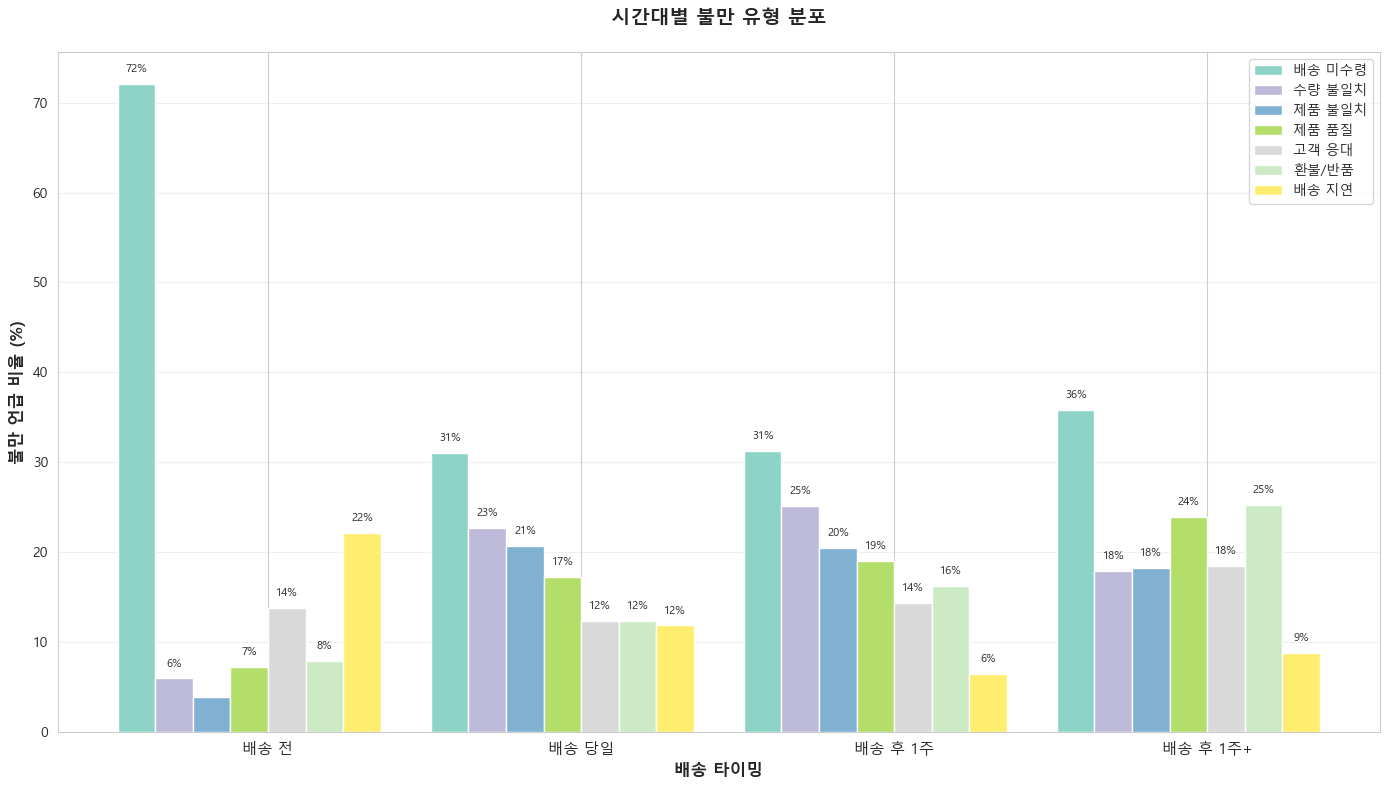

   ✅ 저장: fig7_timing_complaints.png

📊 2. 배송 지연 vs 정시 비교 차트 생성 중...


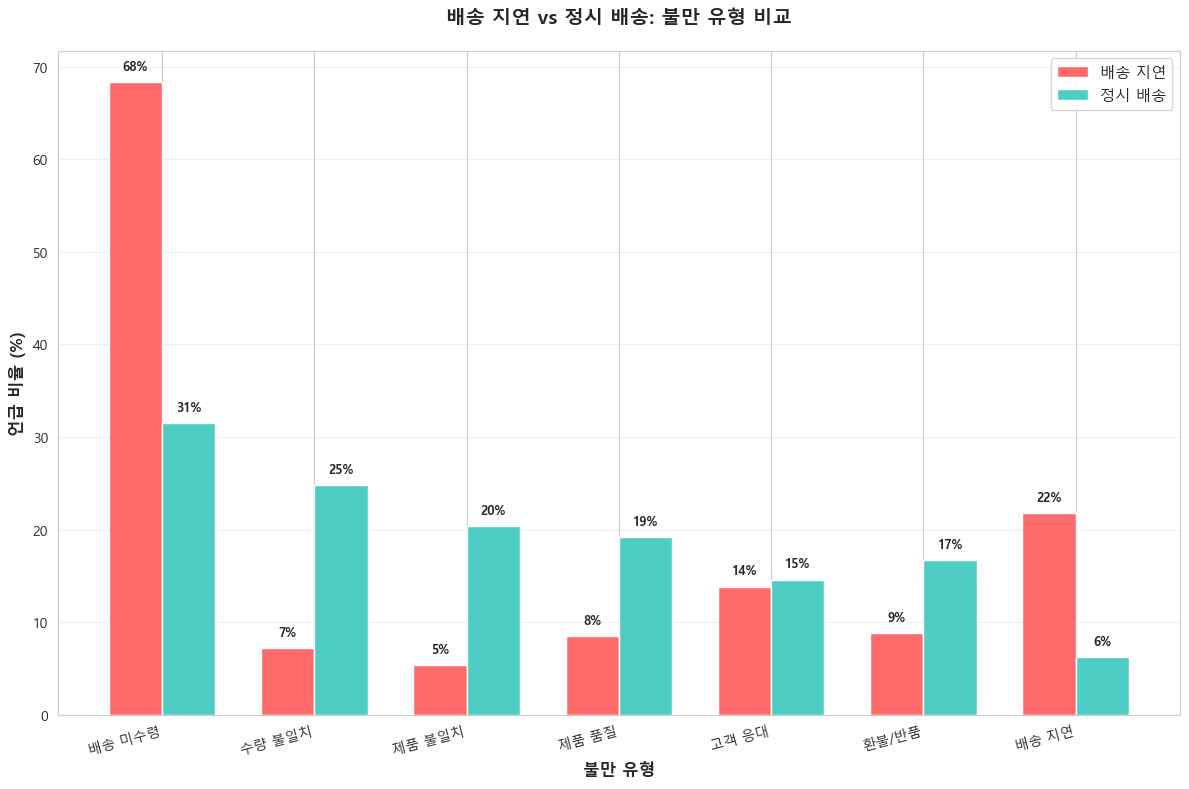

   ✅ 저장: fig8_delayed_vs_ontime.png

📊 3. 시간 흐름에 따른 불만 변화 차트 생성 중...


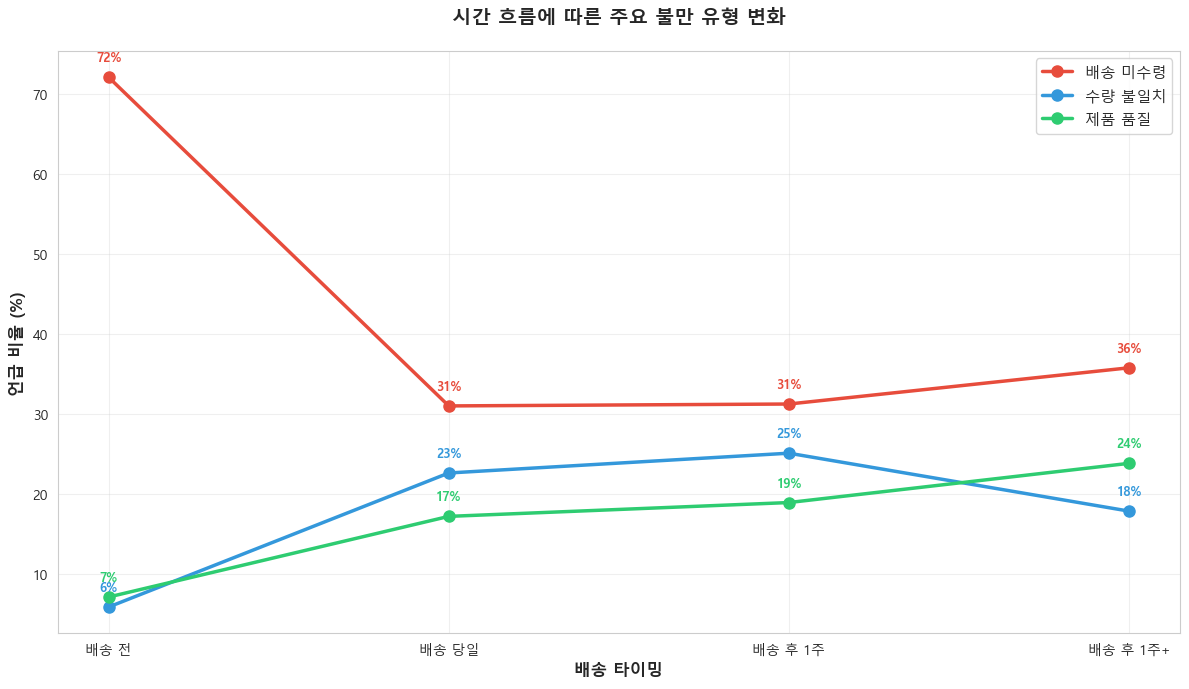

   ✅ 저장: fig9_timeline_trend.png

📊 4. 배송 전 리뷰 특성 차트 생성 중...


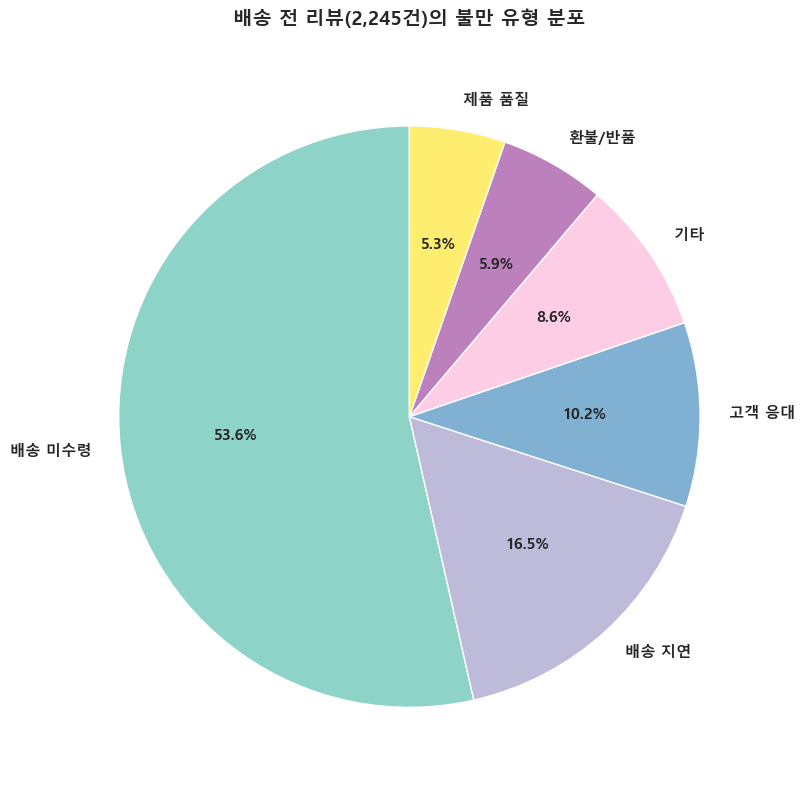

   ✅ 저장: fig10_before_delivery.png

✅ Step 9 완료! 총 4개 시각화 생성

생성된 파일:
  1. fig7_timing_complaints.png - 시간대별 불만 분포
  2. fig8_delayed_vs_ontime.png - 지연 vs 정시 비교
  3. fig9_timeline_trend.png - 시간 흐름 변화
  4. fig10_before_delivery.png - 배송 전 리뷰 특성


In [51]:
# ========================================
# Step 9: 시간 패턴 시각화
# ========================================

print("="*70)
print("Step 9: 시간 패턴 시각화")
print("="*70)

# 데이터 로드
df_timeline = pd.read_csv('../data/one_star_review_result/one_star_timeline_final.csv')
df_classified = pd.read_csv('../data/one_star_review_result/one_star_reviews_classified.csv')

# 조인
df = df_timeline.merge(
    df_classified[['order_id', 'complaint_types_str']],
    on='order_id',
    how='left'
)

df['complaint_types'] = df['complaint_types_str'].apply(
    lambda x: x.split(', ') if pd.notna(x) else []
)

# 시간 그룹 정의
def classify_timing(row):
    if pd.isna(row['days_delivery_to_answer']):
        return '미배송'
    elif row['days_delivery_to_answer'] < 0:
        return '배송 전'
    elif row['days_delivery_to_answer'] == 0:
        return '배송 당일'
    elif row['days_delivery_to_answer'] <= 7:
        return '배송 후 1주'
    else:
        return '배송 후 1주+'

df['timing_group'] = df.apply(classify_timing, axis=1)

# ========================================
# 1. 시간대별 불만 유형 분포 - Stacked Bar
# ========================================

print("\n📊 1. 시간대별 불만 유형 분포 차트 생성 중...")

# 시간 그룹 순서
timing_order = ['배송 전', '배송 당일', '배송 후 1주', '배송 후 1주+']

# 주요 불만 유형
top_complaints = ['배송 미수령', '수량 불일치', '제품 불일치', '제품 품질', '고객 응대', '환불/반품', '배송 지연']

# 데이터 구조 생성
data_matrix = []
for timing in timing_order:
    group = df[df['timing_group'] == timing]
    row = []
    for complaint in top_complaints:
        count = sum(1 for types in group['complaint_types'] if complaint in types)
        percentage = (count / len(group) * 100) if len(group) > 0 else 0
        row.append(percentage)
    data_matrix.append(row)

data_matrix = np.array(data_matrix)

# 차트 생성
fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(timing_order))
width = 0.12

colors = plt.cm.Set3(np.linspace(0, 1, len(top_complaints)))

for i, (complaint, color) in enumerate(zip(top_complaints, colors)):
    offset = width * (i - len(top_complaints)/2)
    bars = ax.bar(x + offset, data_matrix[:, i], width, label=complaint, color=color)
    
    # 값 표시 (5% 이상만)
    for j, (bar, val) in enumerate(zip(bars, data_matrix[:, i])):
        if val >= 5:
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                   f'{val:.0f}%', ha='center', va='bottom', fontsize=8)

ax.set_xlabel('배송 타이밍', fontsize=12, fontweight='bold')
ax.set_ylabel('불만 언급 비율 (%)', fontsize=12, fontweight='bold')
ax.set_title('시간대별 불만 유형 분포', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(timing_order, fontsize=11)
ax.legend(loc='upper right', fontsize=10)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../data/one_star_review_result/fig7_timing_complaints.png', dpi=300, bbox_inches='tight')
plt.show()
print("   ✅ 저장: fig7_timing_complaints.png")

# ========================================
# 2. 배송 지연 vs 정시 비교 - Grouped Bar
# ========================================

print("\n📊 2. 배송 지연 vs 정시 비교 차트 생성 중...")

delayed_data = []
ontime_data = []

for complaint in top_complaints:
    # 지연
    delayed_group = df[df['is_delayed'] == True]
    delayed_count = sum(1 for types in delayed_group['complaint_types'] if complaint in types)
    delayed_pct = (delayed_count / len(delayed_group) * 100) if len(delayed_group) > 0 else 0
    delayed_data.append(delayed_pct)
    
    # 정시
    ontime_group = df[df['is_delayed'] == False]
    ontime_count = sum(1 for types in ontime_group['complaint_types'] if complaint in types)
    ontime_pct = (ontime_count / len(ontime_group) * 100) if len(ontime_group) > 0 else 0
    ontime_data.append(ontime_pct)

fig, ax = plt.subplots(figsize=(12, 8))

x = np.arange(len(top_complaints))
width = 0.35

bars1 = ax.bar(x - width/2, delayed_data, width, label='배송 지연', color='#ff6b6b')
bars2 = ax.bar(x + width/2, ontime_data, width, label='정시 배송', color='#4ecdc4')

# 값 표시
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if height >= 5:
            ax.text(bar.get_x() + bar.get_width()/2, height + 1,
                   f'{height:.0f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

ax.set_xlabel('불만 유형', fontsize=12, fontweight='bold')
ax.set_ylabel('언급 비율 (%)', fontsize=12, fontweight='bold')
ax.set_title('배송 지연 vs 정시 배송: 불만 유형 비교', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(top_complaints, fontsize=10, rotation=15, ha='right')
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../data/one_star_review_result/fig8_delayed_vs_ontime.png', dpi=300, bbox_inches='tight')
plt.show()
print("   ✅ 저장: fig8_delayed_vs_ontime.png")

# ========================================
# 3. 시간 흐름에 따른 주요 불만 변화 - Line Chart
# ========================================

print("\n📊 3. 시간 흐름에 따른 불만 변화 차트 생성 중...")

fig, ax = plt.subplots(figsize=(12, 7))

# 주요 3개 불만만
key_complaints = ['배송 미수령', '수량 불일치', '제품 품질']
colors_line = ['#e74c3c', '#3498db', '#2ecc71']

for complaint, color in zip(key_complaints, colors_line):
    percentages = []
    for timing in timing_order:
        group = df[df['timing_group'] == timing]
        count = sum(1 for types in group['complaint_types'] if complaint in types)
        pct = (count / len(group) * 100) if len(group) > 0 else 0
        percentages.append(pct)
    
    ax.plot(timing_order, percentages, marker='o', linewidth=2.5, 
            markersize=8, label=complaint, color=color)

ax.set_xlabel('배송 타이밍', fontsize=12, fontweight='bold')
ax.set_ylabel('언급 비율 (%)', fontsize=12, fontweight='bold')
ax.set_title('시간 흐름에 따른 주요 불만 유형 변화', fontsize=14, fontweight='bold', pad=20)
ax.legend(fontsize=11, loc='best')
ax.grid(True, alpha=0.3)

# 값 표시
for complaint, color in zip(key_complaints, colors_line):
    percentages = []
    for timing in timing_order:
        group = df[df['timing_group'] == timing]
        count = sum(1 for types in group['complaint_types'] if complaint in types)
        pct = (count / len(group) * 100) if len(group) > 0 else 0
        percentages.append(pct)
    
    for i, (x, y) in enumerate(zip(timing_order, percentages)):
        ax.text(i, y + 2, f'{y:.0f}%', ha='center', fontsize=9, color=color, fontweight='bold')

plt.tight_layout()
plt.savefig('../data/one_star_review_result/fig9_timeline_trend.png', dpi=300, bbox_inches='tight')
plt.show()
print("   ✅ 저장: fig9_timeline_trend.png")

# ========================================
# 4. 배송 전 리뷰의 특성 - Pie Chart
# ========================================

print("\n📊 4. 배송 전 리뷰 특성 차트 생성 중...")

before_delivery = df[df['timing_group'] == '배송 전']

type_counts = {}
for types in before_delivery['complaint_types']:
    for t in types:
        type_counts[t] = type_counts.get(t, 0) + 1

sorted_types = sorted(type_counts.items(), key=lambda x: x[1], reverse=True)[:6]
labels = [x[0] for x in sorted_types]
sizes = [x[1] for x in sorted_types]
colors_pie = plt.cm.Set3(np.linspace(0, 1, len(labels)))

fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%',
                                    colors=colors_pie, startangle=90,
                                    textprops={'fontsize': 11, 'fontweight': 'bold'})

ax.set_title(f'배송 전 리뷰({len(before_delivery):,}건)의 불만 유형 분포', 
             fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('../data/one_star_review_result/fig10_before_delivery.png', dpi=300, bbox_inches='tight')
plt.show()
print("   ✅ 저장: fig10_before_delivery.png")

print("\n" + "="*70)
print("✅ Step 9 완료! 총 4개 시각화 생성")
print("="*70)
print("\n생성된 파일:")
print("  1. fig7_timing_complaints.png - 시간대별 불만 분포")
print("  2. fig8_delayed_vs_ontime.png - 지연 vs 정시 비교")
print("  3. fig9_timeline_trend.png - 시간 흐름 변화")
print("  4. fig10_before_delivery.png - 배송 전 리뷰 특성")
print("="*70)

### 시간 시각화(예상 배송일 기준)

Step 10: 예상 배송일 기준 - 언제 고객이 화를 내는가?

총 분석 대상: 7,181건
예상일 정보 있음: 7,181건

📊 예상 배송일 대비 리뷰 작성 시점

평균: 예상일 -5.0일 후
중앙값: 예상일 -5.0일 후
최소: 예상일 -98일 전
최대: 예상일 300일 후

📊 예상일 기준 그룹별 분포:
----------------------------------------------------------------------
  예상일 7일+ 전            : 2,909건 ( 40.5%)
  예상일 4-7일 전           :   884건 ( 12.3%)
  예상일 1-3일 전           :   468건 (  6.5%)
  예상일 당일               :   121건 (  1.7%)
  예상일 1-3일 후           : 1,630건 ( 22.7%)
  예상일 4-7일 후           :   889건 ( 12.4%)
  예상일 8-14일 후          :   193건 (  2.7%)
  예상일 15-30일 후         :    52건 (  0.7%)
  예상일 30일+ 후           :    35건 (  0.5%)

📊 예상일 기준 그룹별 주요 불만 유형

【예상일 1-3일 전】 (468건)
----------------------------------------------------------------------
  1. 배송 미수령               :  140건 ( 29.9%)
  2. 수량 불일치               :  101건 ( 21.6%)
  3. 환불/반품                :   95건 ( 20.3%)
  4. 제품 불일치               :   92건 ( 19.7%)
  5. 기타                   :   91건 ( 19.4%)

【예상일 당일】 (121건)
--------------------------------------

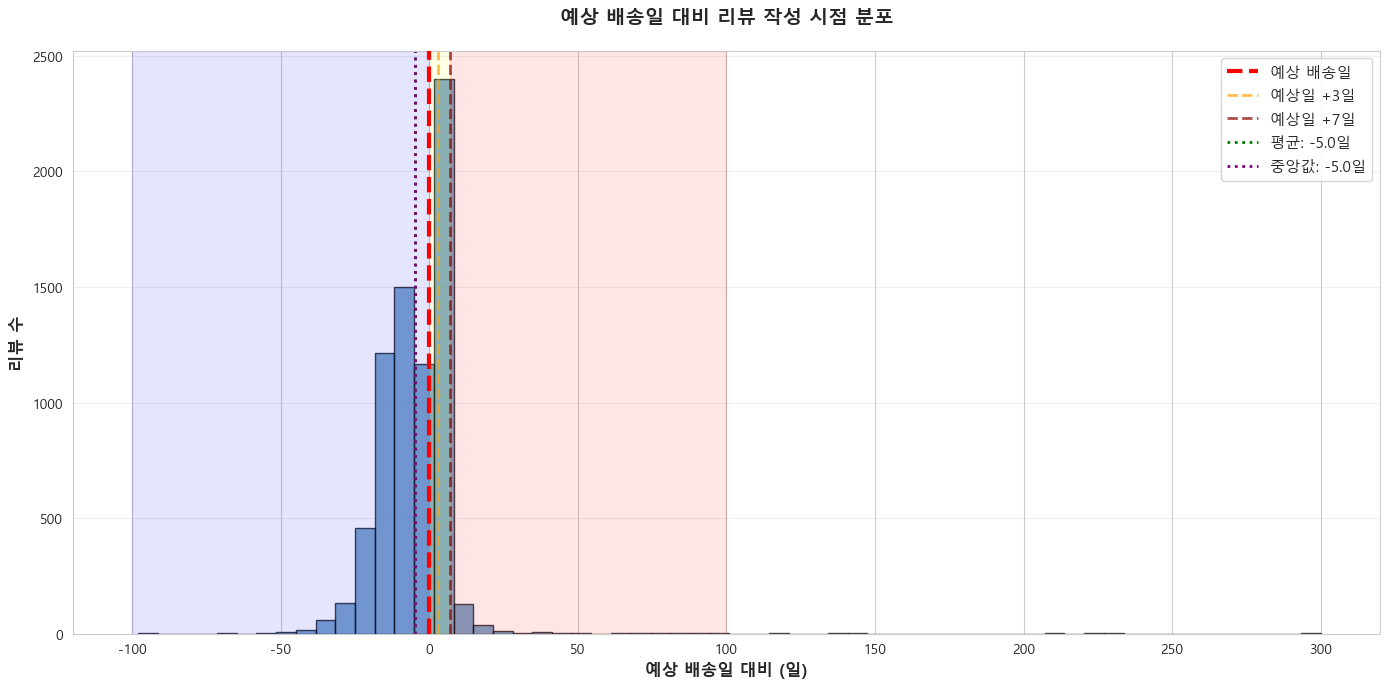

   ✅ 저장: fig11_estimated_distribution.png

2. 시간 그룹별 리뷰 수 차트...


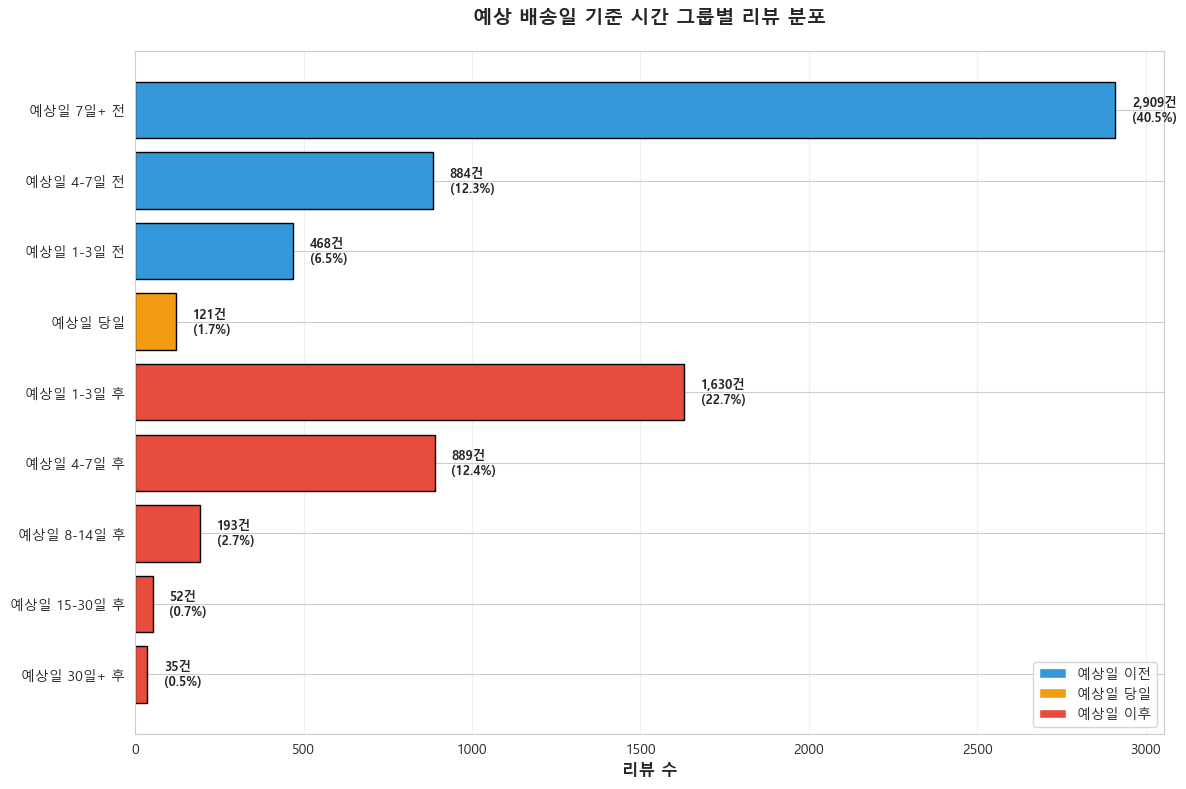

   ✅ 저장: fig12_estimated_groups.png

3. 그룹별 불만 유형 변화 차트...


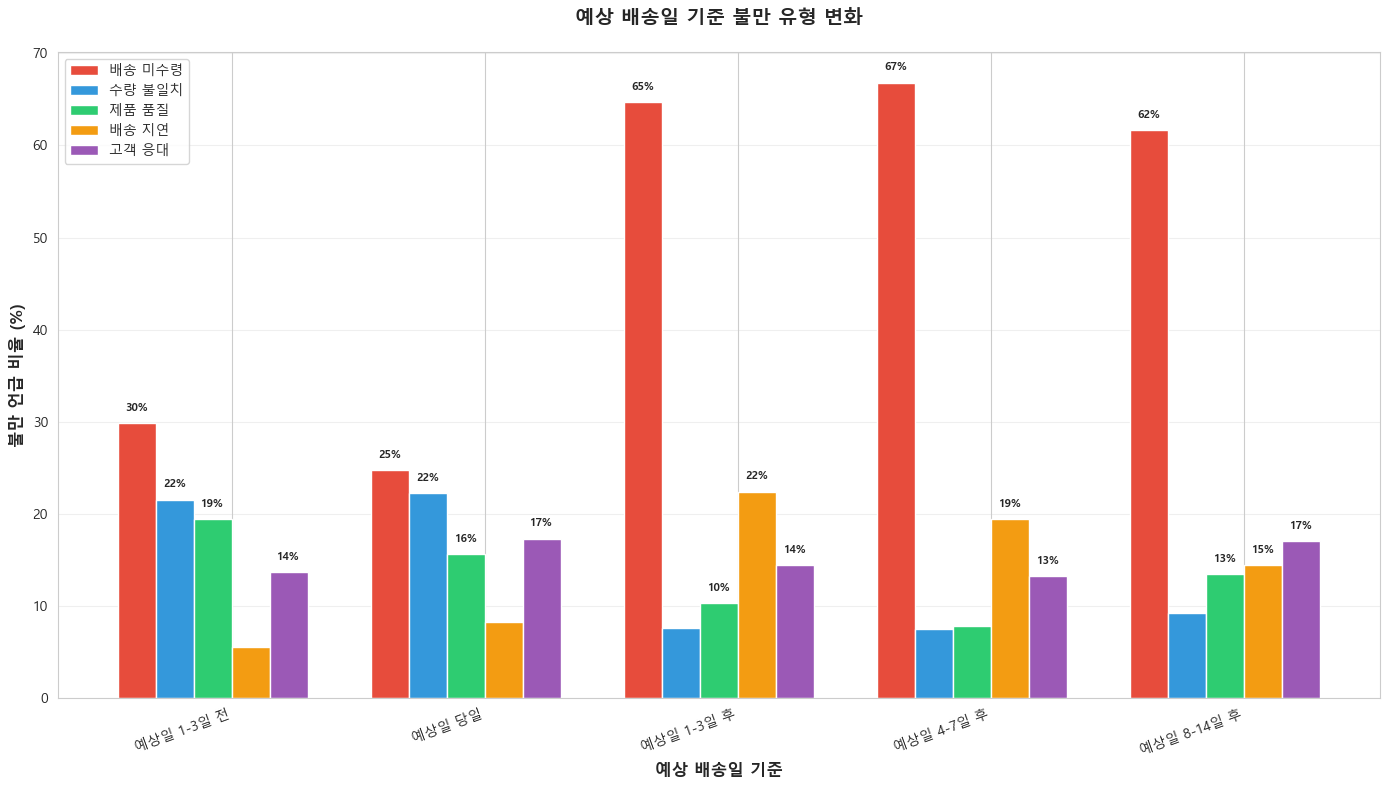

   ✅ 저장: fig13_estimated_complaints.png

4. 조급한 vs 정당한 불만 비교...


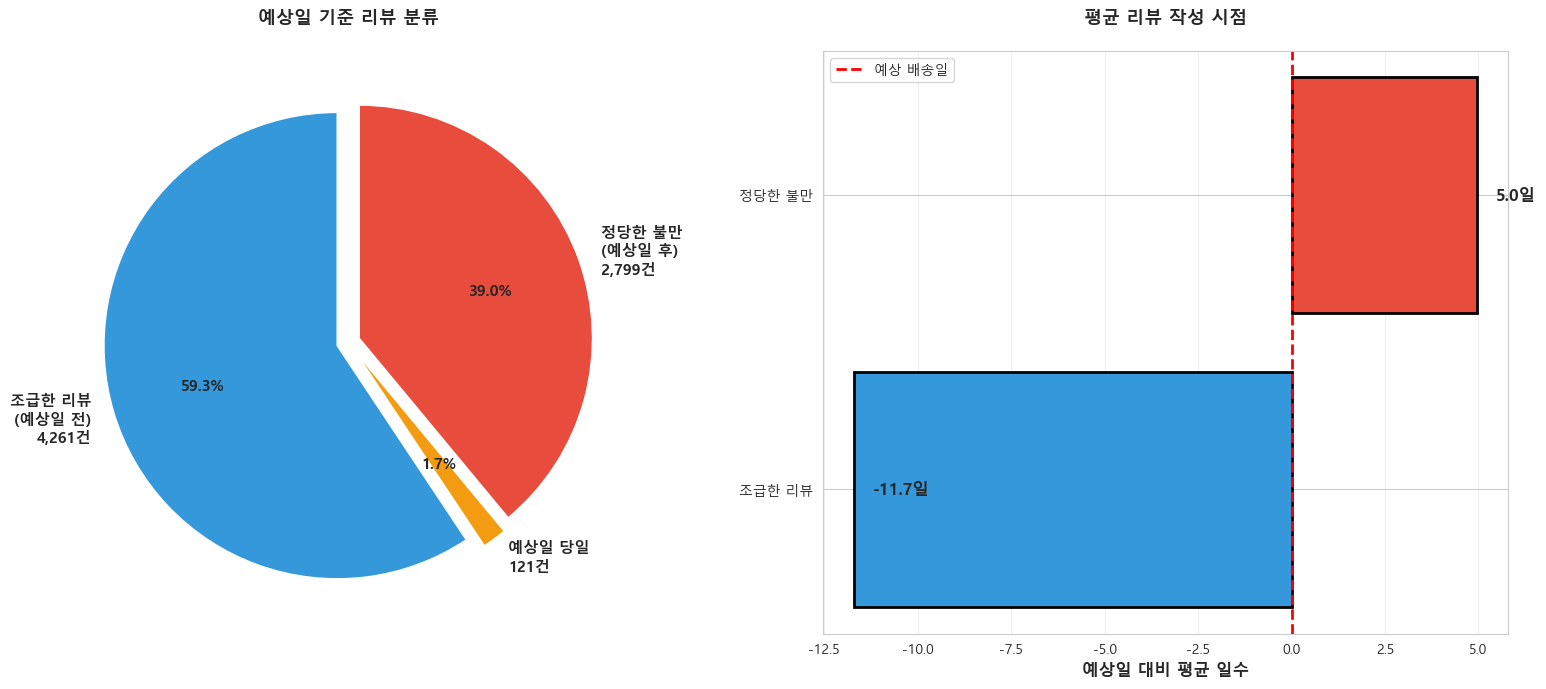

   ✅ 저장: fig14_impatient_vs_justified.png

✅ 시각화 완료! 총 4개 생성

생성된 파일:
  1. fig11_estimated_distribution.png - 예상일 대비 분포
  2. fig12_estimated_groups.png - 시간 그룹별 리뷰 수
  3. fig13_estimated_complaints.png - 불만 유형 변화
  4. fig14_impatient_vs_justified.png - 조급한 vs 정당한 불만


In [53]:
# ========================================
# Step 10: 예상 배송일 기준 분석
# ========================================

print("="*70)
print("Step 10: 예상 배송일 기준 - 언제 고객이 화를 내는가?")
print("="*70)

# 데이터 로드
df_timeline = pd.read_csv('../data/one_star_review_result/one_star_timeline_final.csv')
df_classified = pd.read_csv('../data/one_star_review_result/one_star_reviews_classified.csv')

# 조인
df = df_timeline.merge(
    df_classified[['order_id', 'complaint_types_str']],
    on='order_id',
    how='left'
)

df['complaint_types'] = df['complaint_types_str'].apply(
    lambda x: x.split(', ') if pd.notna(x) else []
)

# 날짜 변환
df['order_estimated'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['review_answered'] = pd.to_datetime(df['review_answer_timestamp'])

# 🎯 핵심 계산: 예상일 대비 리뷰 작성 시점
df['days_from_estimated'] = (df['review_answered'] - df['order_estimated']).dt.days

print(f"\n총 분석 대상: {len(df):,}건")
print(f"예상일 정보 있음: {df['order_estimated'].notna().sum():,}건")

# ========================================
# 1. 기본 통계
# ========================================

print("\n" + "="*70)
print("📊 예상 배송일 대비 리뷰 작성 시점")
print("="*70)

print(f"\n평균: 예상일 {df['days_from_estimated'].mean():.1f}일 후")
print(f"중앙값: 예상일 {df['days_from_estimated'].median():.1f}일 후")
print(f"최소: 예상일 {df['days_from_estimated'].min():.0f}일 전")
print(f"최대: 예상일 {df['days_from_estimated'].max():.0f}일 후")

# ========================================
# 2. 시간 그룹 분류
# ========================================

def classify_by_estimated(days):
    """예상일 기준 그룹 분류"""
    if pd.isna(days):
        return '정보없음'
    elif days < -7:
        return '예상일 7일+ 전'
    elif days < -3:
        return '예상일 4-7일 전'
    elif days < 0:
        return '예상일 1-3일 전'
    elif days == 0:
        return '예상일 당일'
    elif days <= 3:
        return '예상일 1-3일 후'
    elif days <= 7:
        return '예상일 4-7일 후'
    elif days <= 14:
        return '예상일 8-14일 후'
    elif days <= 30:
        return '예상일 15-30일 후'
    else:
        return '예상일 30일+ 후'

df['estimated_group'] = df['days_from_estimated'].apply(classify_by_estimated)

# 그룹별 통계
print("\n📊 예상일 기준 그룹별 분포:")
print("-"*70)
group_order = [
    '예상일 7일+ 전', '예상일 4-7일 전', '예상일 1-3일 전', 
    '예상일 당일', '예상일 1-3일 후', '예상일 4-7일 후',
    '예상일 8-14일 후', '예상일 15-30일 후', '예상일 30일+ 후'
]

for group in group_order:
    count = (df['estimated_group'] == group).sum()
    if count > 0:
        pct = (count / len(df)) * 100
        print(f"  {group:20s} : {count:5,}건 ({pct:5.1f}%)")

# ========================================
# 3. 그룹별 불만 유형 분석
# ========================================

print("\n" + "="*70)
print("📊 예상일 기준 그룹별 주요 불만 유형")
print("="*70)

key_groups = ['예상일 1-3일 전', '예상일 당일', '예상일 1-3일 후', 
              '예상일 4-7일 후', '예상일 8-14일 후', '예상일 30일+ 후']

for group in key_groups:
    group_df = df[df['estimated_group'] == group]
    
    if len(group_df) == 0:
        continue
    
    print(f"\n【{group}】 ({len(group_df):,}건)")
    print("-"*70)
    
    # 불만 유형 카운트
    type_counts = {}
    for types in group_df['complaint_types']:
        for t in types:
            type_counts[t] = type_counts.get(t, 0) + 1
    
    # TOP 5
    sorted_types = sorted(type_counts.items(), key=lambda x: x[1], reverse=True)[:5]
    for i, (complaint_type, count) in enumerate(sorted_types, 1):
        pct = (count / len(group_df)) * 100
        print(f"  {i}. {complaint_type:20s} : {count:4,}건 ({pct:5.1f}%)")

# ========================================
# 4. 핵심 발견: 조급한 vs 정당한 불만
# ========================================

print("\n" + "="*70)
print("🎯 핵심 발견: 조급한 리뷰 vs 정당한 불만")
print("="*70)

# 조급한 리뷰 (예상일 전에 리뷰 작성)
impatient = df[df['days_from_estimated'] < 0]
print(f"\n⚡ 조급한 리뷰 (예상일 전): {len(impatient):,}건 ({len(impatient)/len(df)*100:.1f}%)")
print(f"   평균: 예상일 {impatient['days_from_estimated'].mean():.1f}일 전에 리뷰")

# 정당한 불만 (예상일 지난 후)
justified = df[df['days_from_estimated'] > 0]
print(f"\n✅ 정당한 불만 (예상일 후): {len(justified):,}건 ({len(justified)/len(df)*100:.1f}%)")
print(f"   평균: 예상일 {justified['days_from_estimated'].mean():.1f}일 후에 리뷰")

# 심각한 지연 (예상일 +7일 이상)
severe = df[df['days_from_estimated'] > 7]
print(f"\n🚨 심각한 지연 (예상일 +7일 이상): {len(severe):,}건 ({len(severe)/len(df)*100:.1f}%)")
print(f"   평균: 예상일 {severe['days_from_estimated'].mean():.1f}일 후에 리뷰")

# ========================================
# 5. 비즈니스 액션 포인트
# ========================================

print("\n" + "="*70)
print("💡 비즈니스 액션 포인트")
print("="*70)

# 임계점 분석
critical_points = [
    ('예상일 당일', 0, 0),
    ('예상일 +3일', 1, 3),
    ('예상일 +7일', 4, 7),
    ('예상일 +14일', 8, 14),
    ('예상일 +30일', 15, 30)
]

for label, start, end in critical_points:
    if end == 0:
        group_df = df[df['days_from_estimated'] == start]
    else:
        group_df = df[(df['days_from_estimated'] >= start) & (df['days_from_estimated'] <= end)]
    
    if len(group_df) > 0:
        print(f"\n【{label}】")
        print(f"  리뷰 수: {len(group_df):,}건")
        print(f"  권장 조치: ", end='')
        
        if start == 0:
            print("예상일 당일 자동 배송 알림 발송")
        elif end <= 3:
            print("'배송이 조금 지연되고 있습니다' SMS 발송")
        elif end <= 7:
            print("고객센터 선제 연락 + 소액 쿠폰 제공")
        elif end <= 14:
            print("배송 상태 긴급 확인 + 보상 쿠폰 제공")
        else:
            print("전액 환불 또는 재발송 제안")

# 저장
df.to_csv('../data/one_star_review_result/one_star_estimated_analysis.csv', 
          index=False, encoding='utf-8-sig')

print("\n" + "="*70)
print("✅ Step 10 완료!")
print("💾 저장: one_star_estimated_analysis.csv")
print("="*70)

# Step 10 분석 코드 뒤에 이어서...

print("\n" + "="*70)
print("📊 시각화 생성 중...")
print("="*70)

# ========================================
# 시각화 1: 예상일 대비 리뷰 작성 시점 분포
# ========================================

print("\n1. 예상일 대비 리뷰 작성 시점 히스토그램...")

fig, ax = plt.subplots(figsize=(14, 7))

# 히스토그램
n, bins, patches = ax.hist(df['days_from_estimated'].dropna(), bins=60, 
                            color='steelblue', edgecolor='black', alpha=0.7)

# 예상일 표시
ax.axvline(0, color='red', linestyle='--', linewidth=3, label='예상 배송일', zorder=5)

# 주요 임계점 표시
ax.axvline(3, color='orange', linestyle='--', linewidth=2, alpha=0.7, label='예상일 +3일')
ax.axvline(7, color='darkred', linestyle='--', linewidth=2, alpha=0.7, label='예상일 +7일')

# 평균/중앙값
mean_val = df['days_from_estimated'].mean()
median_val = df['days_from_estimated'].median()
ax.axvline(mean_val, color='green', linestyle=':', linewidth=2, label=f'평균: {mean_val:.1f}일')
ax.axvline(median_val, color='purple', linestyle=':', linewidth=2, label=f'중앙값: {median_val:.1f}일')

ax.set_xlabel('예상 배송일 대비 (일)', fontsize=12, fontweight='bold')
ax.set_ylabel('리뷰 수', fontsize=12, fontweight='bold')
ax.set_title('예상 배송일 대비 리뷰 작성 시점 분포', fontsize=14, fontweight='bold', pad=20)
ax.legend(fontsize=11, loc='upper right')
ax.grid(axis='y', alpha=0.3)

# 영역 표시
ax.axvspan(-100, 0, alpha=0.1, color='blue', label='조급한 리뷰')
ax.axvspan(0, 7, alpha=0.1, color='yellow')
ax.axvspan(7, 100, alpha=0.1, color='red')

plt.tight_layout()
plt.savefig('../data/one_star_review_result/fig11_estimated_distribution.png', 
            dpi=300, bbox_inches='tight')
plt.show()
print("   ✅ 저장: fig11_estimated_distribution.png")

# ========================================
# 시각화 2: 시간 그룹별 리뷰 수
# ========================================

print("\n2. 시간 그룹별 리뷰 수 차트...")

fig, ax = plt.subplots(figsize=(12, 8))

group_counts = []
group_labels = []
for group in group_order:
    count = (df['estimated_group'] == group).sum()
    if count > 0:
        group_counts.append(count)
        group_labels.append(group)

colors = ['#3498db' if '전' in label else 
          '#f39c12' if '당일' in label else
          '#e74c3c' for label in group_labels]

bars = ax.barh(group_labels, group_counts, color=colors, edgecolor='black', linewidth=1)

# 값 표시
for i, (bar, count) in enumerate(zip(bars, group_counts)):
    pct = (count / len(df)) * 100
    ax.text(count + 50, i, f'{count:,}건\n({pct:.1f}%)', 
            va='center', fontsize=9, fontweight='bold')

ax.set_xlabel('리뷰 수', fontsize=12, fontweight='bold')
ax.set_title('예상 배송일 기준 시간 그룹별 리뷰 분포', fontsize=14, fontweight='bold', pad=20)
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3)

# 범례
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#3498db', label='예상일 이전'),
    Patch(facecolor='#f39c12', label='예상일 당일'),
    Patch(facecolor='#e74c3c', label='예상일 이후')
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=10)

plt.tight_layout()
plt.savefig('../data/one_star_review_result/fig12_estimated_groups.png', 
            dpi=300, bbox_inches='tight')
plt.show()
print("   ✅ 저장: fig12_estimated_groups.png")

# ========================================
# 시각화 3: 그룹별 주요 불만 유형 변화
# ========================================

print("\n3. 그룹별 불만 유형 변화 차트...")

# 주요 그룹만
key_groups_viz = ['예상일 1-3일 전', '예상일 당일', '예상일 1-3일 후', 
                  '예상일 4-7일 후', '예상일 8-14일 후']

# 주요 불만 유형
top_complaints = ['배송 미수령', '수량 불일치', '제품 품질', '배송 지연', '고객 응대']

# 데이터 수집
data_matrix = []
for group in key_groups_viz:
    group_df = df[df['estimated_group'] == group]
    if len(group_df) == 0:
        continue
    
    row = []
    for complaint in top_complaints:
        count = sum(1 for types in group_df['complaint_types'] if complaint in types)
        pct = (count / len(group_df) * 100) if len(group_df) > 0 else 0
        row.append(pct)
    data_matrix.append(row)

data_matrix = np.array(data_matrix)

# 차트
fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(key_groups_viz))
width = 0.15

colors_bar = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6']

for i, (complaint, color) in enumerate(zip(top_complaints, colors_bar)):
    offset = width * (i - len(top_complaints)/2)
    bars = ax.bar(x + offset, data_matrix[:, i], width, label=complaint, color=color)
    
    # 값 표시 (10% 이상만)
    for j, (bar, val) in enumerate(zip(bars, data_matrix[:, i])):
        if val >= 10:
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                   f'{val:.0f}%', ha='center', va='bottom', fontsize=8, fontweight='bold')

ax.set_xlabel('예상 배송일 기준', fontsize=12, fontweight='bold')
ax.set_ylabel('불만 언급 비율 (%)', fontsize=12, fontweight='bold')
ax.set_title('예상 배송일 기준 불만 유형 변화', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(key_groups_viz, fontsize=10, rotation=20, ha='right')
ax.legend(loc='upper left', fontsize=10)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../data/one_star_review_result/fig13_estimated_complaints.png', 
            dpi=300, bbox_inches='tight')
plt.show()
print("   ✅ 저장: fig13_estimated_complaints.png")

# ========================================
# 시각화 4: 조급한 vs 정당한 불만 비교
# ========================================

print("\n4. 조급한 vs 정당한 불만 비교...")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# 좌측: 비율 파이차트
impatient_count = len(impatient)
justified_count = len(justified)
ontime_count = (df['days_from_estimated'] == 0).sum()

sizes = [impatient_count, ontime_count, justified_count]
labels = [f'조급한 리뷰\n(예상일 전)\n{impatient_count:,}건', 
          f'예상일 당일\n{ontime_count:,}건',
          f'정당한 불만\n(예상일 후)\n{justified_count:,}건']
colors_pie = ['#3498db', '#f39c12', '#e74c3c']
explode = (0.05, 0.05, 0.05)

wedges, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
                                     colors=colors_pie, explode=explode,
                                     startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})

ax1.set_title('예상일 기준 리뷰 분류', fontsize=13, fontweight='bold', pad=20)

# 우측: 평균 시점 비교
categories = ['조급한 리뷰', '정당한 불만']
avg_days = [impatient['days_from_estimated'].mean(), 
            justified['days_from_estimated'].mean()]
colors_bar2 = ['#3498db', '#e74c3c']

bars = ax2.barh(categories, avg_days, color=colors_bar2, edgecolor='black', linewidth=2)

for bar, val in zip(bars, avg_days):
    ax2.text(val + 0.5, bar.get_y() + bar.get_height()/2, 
            f'{val:.1f}일', va='center', fontsize=12, fontweight='bold')

ax2.axvline(0, color='red', linestyle='--', linewidth=2, label='예상 배송일')
ax2.set_xlabel('예상일 대비 평균 일수', fontsize=12, fontweight='bold')
ax2.set_title('평균 리뷰 작성 시점', fontsize=13, fontweight='bold', pad=20)
ax2.legend(fontsize=10)
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('../data/one_star_review_result/fig14_impatient_vs_justified.png', 
            dpi=300, bbox_inches='tight')
plt.show()
print("   ✅ 저장: fig14_impatient_vs_justified.png")

print("\n" + "="*70)
print("✅ 시각화 완료! 총 4개 생성")
print("="*70)
print("\n생성된 파일:")
print("  1. fig11_estimated_distribution.png - 예상일 대비 분포")
print("  2. fig12_estimated_groups.png - 시간 그룹별 리뷰 수")
print("  3. fig13_estimated_complaints.png - 불만 유형 변화")
print("  4. fig14_impatient_vs_justified.png - 조급한 vs 정당한 불만")
print("="*70)

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 한글 폰트
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
sns.set_style('whitegrid')

# ========================================
# Step 11: "조급한 리뷰" 심층 분석
# ========================================

print("="*70)
print("Step 11: 조급한 리뷰 심층 분석 - 진짜 조급한가?")
print("="*70)

# 데이터 로드
df = pd.read_csv('../data/one_star_review_result/one_star_estimated_analysis.csv')

# 날짜 변환
df['order_purchase'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['review_answered'] = pd.to_datetime(df['review_answer_timestamp'])

# complaint_types 복원
df['complaint_types'] = df['complaint_types_str'].apply(
    lambda x: x.split(', ') if pd.notna(x) else []
)

# ========================================
# 1. 조급한 리뷰 정의 및 분류
# ========================================

# 조급한 리뷰 = 예상일 전에 리뷰 작성
impatient = df[df['days_from_estimated'] < 0].copy()

print(f"\n📊 조급한 리뷰: {len(impatient):,}건 ({len(impatient)/len(df)*100:.1f}%)")

# ========================================
# 2. 핵심 질문 1: 배송은 받았나?
# ========================================

print("\n" + "="*70)
print("❓ 핵심 질문 1: 예상일 전인데, 배송은 받았나?")
print("="*70)

delivered = impatient['order_delivered'].notna()
print(f"\n배송 완료됨: {delivered.sum():,}건 ({delivered.sum()/len(impatient)*100:.1f}%)")
print(f"배송 미완료: {(~delivered).sum():,}건 ({(~delivered).sum()/len(impatient)*100:.1f}%)")

# 배송 완료된 경우
if delivered.sum() > 0:
    delivered_df = impatient[delivered]
    
    # 배송 완료 → 리뷰 작성 시간
    delivered_df['days_delivery_to_review'] = (
        delivered_df['review_answered'] - delivered_df['order_delivered']
    ).dt.days
    
    print(f"\n✅ 배송 완료 후 리뷰 작성:")
    print(f"   평균: 배송 후 {delivered_df['days_delivery_to_review'].mean():.1f}일")
    print(f"   중앙값: 배송 후 {delivered_df['days_delivery_to_review'].median():.1f}일")
    
    # 배송 빨리 온 경우
    early_delivery = delivered_df[delivered_df['order_delivered'] < delivered_df['order_estimated']]
    print(f"\n   🚀 예상보다 빨리 배송: {len(early_delivery):,}건 ({len(early_delivery)/len(delivered_df)*100:.1f}%)")
    if len(early_delivery) > 0:
        early_days = (early_delivery['order_estimated'] - early_delivery['order_delivered']).dt.days
        print(f"      평균 {early_days.mean():.1f}일 일찍 도착")

# ========================================
# 3. 핵심 질문 2: 주문 후 얼마나 기다렸나?
# ========================================

print("\n" + "="*70)
print("❓ 핵심 질문 2: 주문 후 실제로 얼마나 기다렸나?")
print("="*70)

# 주문 → 리뷰 작성
impatient['days_order_to_review'] = (
    impatient['review_answered'] - impatient['order_purchase']
).dt.days

print(f"\n주문 → 리뷰 작성:")
print(f"   평균: {impatient['days_order_to_review'].mean():.1f}일")
print(f"   중앙값: {impatient['days_order_to_review'].median():.1f}일")
print(f"   최소: {impatient['days_order_to_review'].min():.0f}일")
print(f"   최대: {impatient['days_order_to_review'].max():.0f}일")

# 구간별 분포
week_1 = (impatient['days_order_to_review'] <= 7).sum()
week_2 = ((impatient['days_order_to_review'] > 7) & (impatient['days_order_to_review'] <= 14)).sum()
week_3 = ((impatient['days_order_to_review'] > 14) & (impatient['days_order_to_review'] <= 30)).sum()
month_plus = (impatient['days_order_to_review'] > 30).sum()

print(f"\n구간별 분포:")
print(f"   7일 이내:   {week_1:,}건 ({week_1/len(impatient)*100:.1f}%) - 정말 조급!")
print(f"   8-14일:     {week_2:,}건 ({week_2/len(impatient)*100:.1f}%)")
print(f"   15-30일:    {week_3:,}건 ({week_3/len(impatient)*100:.1f}%)")
print(f"   30일 이상:  {month_plus:,}건 ({month_plus/len(impatient)*100:.1f}%) - 충분히 기다림")

# ========================================
# 4. 핵심 질문 3: 예상 배송 기간이 너무 긴가?
# ========================================

print("\n" + "="*70)
print("❓ 핵심 질문 3: 예상 배송 기간이 너무 길게 설정됐나?")
print("="*70)

# 주문 → 예상일
impatient['expected_delivery_days'] = (
    impatient['order_estimated'] - impatient['order_purchase']
).dt.days

print(f"\n예상 배송 기간:")
print(f"   평균: {impatient['expected_delivery_days'].mean():.1f}일")
print(f"   중앙값: {impatient['expected_delivery_days'].median():.1f}일")
print(f"   최소: {impatient['expected_delivery_days'].min():.0f}일")
print(f"   최대: {impatient['expected_delivery_days'].max():.0f}일")

# 구간별
short = (impatient['expected_delivery_days'] <= 14).sum()
medium = ((impatient['expected_delivery_days'] > 14) & (impatient['expected_delivery_days'] <= 30)).sum()
long = ((impatient['expected_delivery_days'] > 30) & (impatient['expected_delivery_days'] <= 60)).sum()
very_long = (impatient['expected_delivery_days'] > 60).sum()

print(f"\n예상 기간별:")
print(f"   14일 이내:  {short:,}건 ({short/len(impatient)*100:.1f}%)")
print(f"   15-30일:    {medium:,}건 ({medium/len(impatient)*100:.1f}%)")
print(f"   31-60일:    {long:,}건 ({long/len(impatient)*100:.1f}%)")
print(f"   60일 이상:  {very_long:,}건 ({very_long/len(impatient)*100:.1f}%) ← 너무 길음!")

# ========================================
# 5. 진짜 vs 가짜 "조급한 리뷰"
# ========================================

print("\n" + "="*70)
print("🎯 결론: 진짜 조급 vs 정당한 불만")
print("="*70)

# 진짜 조급: 주문 후 7일 이내 + 예상일 7일 이상 남음
really_impatient = impatient[
    (impatient['days_order_to_review'] <= 7) & 
    (impatient['days_from_estimated'] <= -7)
]

# 정당한 불만: 주문 후 30일 이상 기다림 (예상일이 너무 길게 설정됨)
justified_impatient = impatient[impatient['days_order_to_review'] >= 30]

# 중간: 2-4주 기다림
moderate = impatient[
    (impatient['days_order_to_review'] > 7) & 
    (impatient['days_order_to_review'] < 30)
]

print(f"\n🔴 진짜 조급한 리뷰: {len(really_impatient):,}건 ({len(really_impatient)/len(impatient)*100:.1f}%)")
print(f"   - 주문 후 7일 이내 리뷰 + 예상일 7일 이상 남음")
print(f"   - 평균: 주문 후 {really_impatient['days_order_to_review'].mean():.1f}일")

print(f"\n🟡 중간 (2-4주): {len(moderate):,}건 ({len(moderate)/len(impatient)*100:.1f}%)")
print(f"   - 평균: 주문 후 {moderate['days_order_to_review'].mean():.1f}일")

print(f"\n🟢 정당한 불만: {len(justified_impatient):,}건 ({len(justified_impatient)/len(impatient)*100:.1f}%)")
print(f"   - 주문 후 30일 이상 기다림 (예상일이 너무 길게 설정)")
print(f"   - 평균: 주문 후 {justified_impatient['days_order_to_review'].mean():.1f}일")

# ========================================
# 6. 그룹별 불만 유형 비교
# ========================================

print("\n" + "="*70)
print("📊 그룹별 불만 유형 차이")
print("="*70)

groups = {
    '진짜 조급': really_impatient,
    '중간 (2-4주)': moderate,
    '정당한 불만': justified_impatient
}

for group_name, group_df in groups.items():
    if len(group_df) == 0:
        continue
    
    print(f"\n【{group_name}】 ({len(group_df):,}건)")
    
    type_counts = {}
    for types in group_df['complaint_types']:
        for t in types:
            type_counts[t] = type_counts.get(t, 0) + 1
    
    sorted_types = sorted(type_counts.items(), key=lambda x: x[1], reverse=True)[:3]
    for i, (complaint, count) in enumerate(sorted_types, 1):
        pct = (count / len(group_df)) * 100
        print(f"   {i}. {complaint:20s} : {count:4,}건 ({pct:5.1f}%)")

# 저장
impatient['category'] = 'unknown'
impatient.loc[really_impatient.index, 'category'] = '진짜 조급'
impatient.loc[moderate.index, 'category'] = '중간'
impatient.loc[justified_impatient.index, 'category'] = '정당한 불만'

impatient.to_csv('../data/one_star_review_result/impatient_review_analysis.csv', 
                 index=False, encoding='utf-8-sig')

print("\n" + "="*70)
print("✅ Step 11 완료!")
print("💾 저장: impatient_review_analysis.csv")
print("="*70)

Step 11: 조급한 리뷰 심층 분석 - 진짜 조급한가?

📊 조급한 리뷰: 4,261건 (59.3%)

❓ 핵심 질문 1: 예상일 전인데, 배송은 받았나?

배송 완료됨: 4,261건 (100.0%)
배송 미완료: 0건 (0.0%)

✅ 배송 완료 후 리뷰 작성:
   평균: 배송 후 2.2일
   중앙값: 배송 후 1.0일

   🚀 예상보다 빨리 배송: 4,245건 (99.6%)
      평균 13.6일 일찍 도착

❓ 핵심 질문 2: 주문 후 실제로 얼마나 기다렸나?

주문 → 리뷰 작성:
   평균: 14.1일
   중앙값: 13.0일
   최소: -77일
   최대: 62일

구간별 분포:
   7일 이내:   674건 (15.8%) - 정말 조급!
   8-14일:     1,874건 (44.0%)
   15-30일:    1,600건 (37.5%)
   30일 이상:  113건 (2.7%) - 충분히 기다림

❓ 핵심 질문 3: 예상 배송 기간이 너무 길게 설정됐나?

예상 배송 기간:
   평균: 25.3일
   중앙값: 24.0일
   최소: 5일
   최대: 97일

예상 기간별:
   14일 이내:  437건 (10.3%)
   15-30일:    2,805건 (65.8%)
   31-60일:    1,003건 (23.5%)
   60일 이상:  16건 (0.4%) ← 너무 길음!

🎯 결론: 진짜 조급 vs 정당한 불만

🔴 진짜 조급한 리뷰: 550건 (12.9%)
   - 주문 후 7일 이내 리뷰 + 예상일 7일 이상 남음
   - 평균: 주문 후 5.6일

🟡 중간 (2-4주): 3,450건 (81.0%)
   - 평균: 주문 후 14.9일

🟢 정당한 불만: 137건 (3.2%)
   - 주문 후 30일 이상 기다림 (예상일이 너무 길게 설정)
   - 평균: 주문 후 35.0일

📊 그룹별 불만 유형 차이

【진짜 조급】 (550건)
   1. 배송 미수령               :  176건 ( 32.0%)
   2. 수